In [1]:
#load package
.libPaths(c("/cluster/home/liuhengxin/software/miniconda3_2/envs/r-kernel/lib/R/library",
           "/cluster/home/liuhengxin/software/miniconda3/envs/r4.1.2/lib/R/library",
           "/cluster/home/liuhengxin/software/miniconda3_2/envs/Rsplot/lib/R/library"))
library(data.table)
library(qs) 
library(GenomicRanges)
library(GenomicFeatures)
library(rtracklayer)
library(dplyr)
library(ggbio)
library(reshape2)
library(ggsci)
library(viridis)
library(ggpubr)
library(ggh4x)
library(ggtranscript)
library(khroma)
library(bambu)
library(ggdensity)
library(Seurat)
library(ggsignif) # Significance Brackets for 'ggplot2'
library(gghalves) # Compose Half-Half Plots Using Your Favourite Geoms
library(randomcoloR)
library(ComplexHeatmap)
library(ggvenn)

qs 0.25.5

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:data.table’:

    first, second


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: I

In [2]:
setwd("/cluster/home/liuhengxin/P1_brain_nanopore/")
MySplit = function(str,sep, n){
  return(unlist(lapply(strsplit(str,sep),"[[",n)))
}

In [3]:
theme_presentation<- function(base_size = 16, base_family = "") {
  # Starts with theme_grey and then modify some parts
  theme_bw(base_size = base_size, base_family = base_family) %+replace%
    theme(
      strip.background = element_blank(),
      strip.text.x = element_text(size=16,colour="white"),
      strip.text.y = element_text(size=16,colour="white"),
      axis.text.x = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks =  element_blank(), 
      axis.title.x= element_blank(),
      axis.title.y= element_blank(),
      panel.background = element_rect(fill="black"), 
      panel.border =element_blank(),  
      panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(), 
      panel.margin = unit(1.0, "lines"), 
      plot.background = element_rect(fill="black"), 
      plot.title =element_text(size=16,colour="white"), 
      # plot.margin = unit(c(1,  1, 1, 1), "lines"),
      legend.background=element_rect(fill='black'),
      legend.title=element_text(size=12,colour="white"),
      legend.text=element_text(size=12,colour="white"),
      legend.key = element_rect( fill = 'black'),
      # legend.key.size = unit(c(0, 0), "lines"),
      axis.line.x = element_blank(),
      axis.line.y = element_blank()
    )
}


In [4]:
rt_vm116 = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/VM11LPT6_Y00983LA_trans_total_anno_withcid_filter_25_12_02.qs")
rt_vm062 = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/VM06LP2_Y00985CC_trans_total_anno_withcid_filter_25_12_02.qs")
rt_vm112 = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/VM11LPT2_B05253E6_trans_total_anno_withcid_filter_25_12_02.qs")
rt_me01 = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ME012_Y00986G1_trans_total_anno_withcid_filter_25_12_02.qs")

In [17]:
areaedge.vm1102 = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/VM1102_areaedge_density_12_02.qs")
backp.vm1102 = qread(file = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/VM1102_backpoint_12_02.qs")
areaedge.vm0602 = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/VM0602_areaedge_density_12_02.qs")
backp.vm0602 = qread(file = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/VM0602_backpoint_12_02.qs")
areaedge.me01 = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/ME01_areaedge_density_12_02.qs")
backp.me01 = qread(file = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/ME01_backpoint_12_02.qs")
areaedge.vm1106 = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/VM1106_areaedge_density105_12_02.qs")
backp.vm1106 = qread(file = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/VM1106_backpoint_12_02.qs")

In [38]:
binsp = areaedge.vm1106[,c("x1","y1")]
binsp$label = "none"
write.csv(binsp,file = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/VM1106_bin200_coord.csv",
            quote = F,row.names =F)

In [30]:

# write.csv(binsp,file = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/VM1106_bin200_coord.csv",
#             quote = F,row.names =F)

## Annotation ME01 region

In [7]:
import scanpy as sc
from anndata import AnnData
import numpy as np
import pandas as pd
# import stereo as st
adata = sc.read("/cluster/share/B122_share/ztron_sftp/data/2025/2025_LCY/SX/SOFT/SAW_results/ME01_2/outs/analysis/Y00986G1.bin20_1.0.h5ad")
adata

Only considering the two last: ['.0', '.h5ad'].
Only considering the two last: ['.0', '.h5ad'].


AnnData object with n_obs × n_vars = 380013 × 43429
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden', 'orig.ident', 'x', 'y'
    var: 'real_gene_name', 'n_cells', 'n_counts', 'mean_umi', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bin_size', 'bin_type', 'gene_exp_leiden', 'hvg', 'key_record', 'leiden_resolution', 'merged', 'neighbors', 'omics', 'pca_variance_ratio', 'rank_genes_groups', 'resolution', 'result_keys', 'sn'
    obsm: 'X_pca', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

<Figure size 1200x800 with 0 Axes>

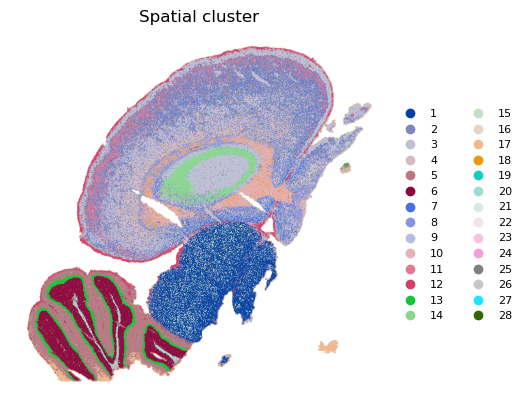

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sc.pl.spatial(
    adata, 
    color='leiden', 
    title='Spatial cluster',
    frameon=False,img_key=None, spot_size=30,
    legend_fontsize=8,
    legend_fontoutline=1,
    size=1.2,  # 点的大小
    show=False
)
plt.show()

In [19]:
# 重新运行差异表达分析，使用 wilcoxon 方法
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon', key_added='rank_genes_groups')
# 重新检查键
print(adata.uns['rank_genes_groups'].keys())

/cluster/home/liuhengxin/software/miniconda3_2/envs/r-kernel/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/cluster/home/liuhengxin/software/miniconda3_2/envs/r-kernel/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/cluster/home/liuhengxin/software/miniconda3_2/envs/r-kerne

dict_keys(['params', 'names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges'])


In [20]:
adata.write_h5ad("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/result/figure_revision/me01_bin20_process.h5ad")

In [14]:
print(adata.uns.keys()) # 查看uns中的键
if 'rank_genes_groups' in adata.uns:
    print("Marker基因已计算")
    # 查看有哪些cluster
    print(adata.obs['leiden'].cat.categories)
else:
    print("未找到已计算的Marker基因，需要进行计算")

dict_keys(['bin_size', 'bin_type', 'gene_exp_leiden', 'hvg', 'key_record', 'leiden_resolution', 'merged', 'neighbors', 'omics', 'pca_variance_ratio', 'rank_genes_groups', 'resolution', 'result_keys', 'sn', 'leiden_colors'])
Marker基因已计算
Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28'],
      dtype='object')


In [21]:
sc.get.rank_genes_groups_df(adata, group=cluster_id)

,names,scores,logfoldchanges,pvals,pvals_adj
0,ENSMUSG00000039883.6,205.027008,4.625474,0.0,0.0
1,ENSMUSG00000041974.11,137.266052,1.948572,0.0,0.0
2,ENSMUSG00000040828.11,126.436859,1.805866,0.0,0.0
3,ENSMUSG00000115783.3,123.663162,1.772057,0.0,0.0
4,ENSMUSG00000034990.16,83.878716,1.458169,0.0,0.0
...,...,...,...,...,...
43424,ENSMUSG00000024617.17,-63.059452,-1.489749,0.0,0.0
43425,ENSMUSG00000049775.17,-67.397476,-1.571921,0.0,0.0
43426,ENSMUSG00000053310.12,-73.437904,-1.674737,0.0,0.0
43427,ENSMUSG00000070570.6,-80.313194,-2.503121,0.0,0.0


In [53]:
# 获取每个cluster的前N个标记基因
import pandas as pd
markers_dict = {}
n_top_genes = 10  # 每个cluster选取前3个标记基因用于演示，您可以根据需要调整

for cluster_id in adata.obs['leiden'].cat.categories:
    # 方法一：使用scanpy的辅助函数（推荐）
    de_df = sc.get.rank_genes_groups_df(adata, group=cluster_id)
    top_genes = de_df.names.head(n_top_genes).tolist()
    markers_dict[cluster_id] = top_genes

    # 方法二：直接从uns结构中提取（备选）
    # cluster_index = list(adata.uns['rank_genes_groups']['names'].dtype.names).index(cluster_id)
    # top_genes = [adata.uns['rank_genes_groups']['names'][cluster_index][i] for i in range(n_top_genes)]
    # markers_dict[cluster_id] = top_genes

# 打印查看
for cluster, genes in markers_dict.items():
    print(f"Cluster {cluster} top markers: {genes}")

Cluster 1 top markers: ['ENSMUSG00000039883.6', 'ENSMUSG00000041974.11', 'ENSMUSG00000040828.11', 'ENSMUSG00000115783.3', 'ENSMUSG00000034990.16', 'ENSMUSG00000033653.20', 'ENSMUSG00000064338.1', 'ENSMUSG00000113543.3', 'ENSMUSG00000042203.9', 'ENSMUSG00000031425.16']
Cluster 2 top markers: ['ENSMUSG00000053310.12', 'ENSMUSG00000046447.4', 'ENSMUSG00000033161.11', 'ENSMUSG00000024617.17', 'ENSMUSG00000031840.15', 'ENSMUSG00000033953.11', 'ENSMUSG00000070570.6', 'ENSMUSG00000032532.8', 'ENSMUSG00000049556.6', 'ENSMUSG00000026833.19']
Cluster 3 top markers: ['ENSMUSG00000059213.8', 'ENSMUSG00000026841.8', 'ENSMUSG00000050074.13', 'ENSMUSG00000090291.4', 'ENSMUSG00000049001.6', 'ENSMUSG00000114348.2', 'ENSMUSG00000026697.11', 'ENSMUSG00000032014.7', 'ENSMUSG00000048562.8', 'ENSMUSG00000032269.9']
Cluster 4 top markers: ['ENSMUSG00000039883.6', 'ENSMUSG00000049775.17', 'ENSMUSG00000053310.12', 'ENSMUSG00000028832.12', 'ENSMUSG00000001175.17', 'ENSMUSG00000036438.15', 'ENSMUSG00000070570.6'

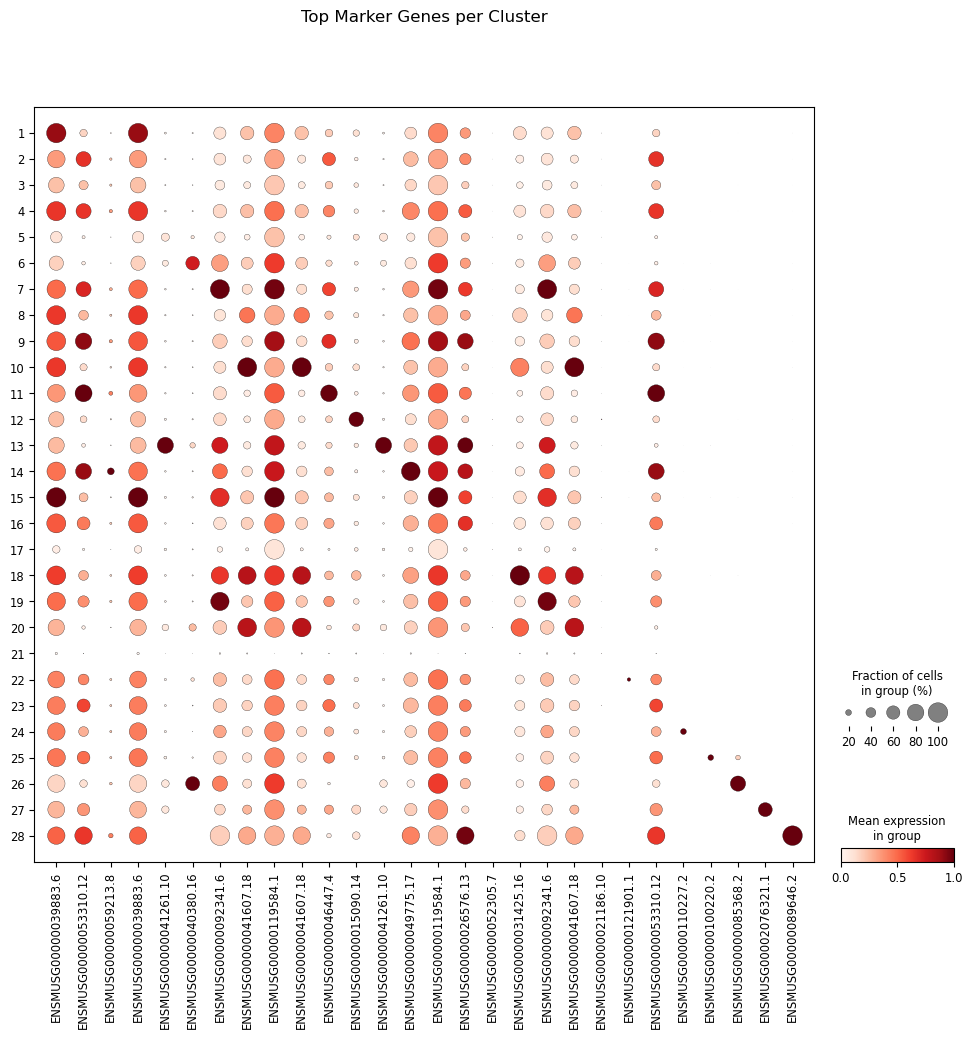

In [54]:
# 从所有cluster中选取一些最具代表性的基因生成一个列表
# 例如，选取每个cluster排名第一的基因
unique_top_markers = [markers_dict[cl][0] for cl in adata.obs['leiden'].cat.categories if markers_dict[cl]]
# 绘制点图
sc.pl.dotplot(adata, var_names=unique_top_markers, groupby='leiden', title="Top Marker Genes per Cluster", standard_scale='var')

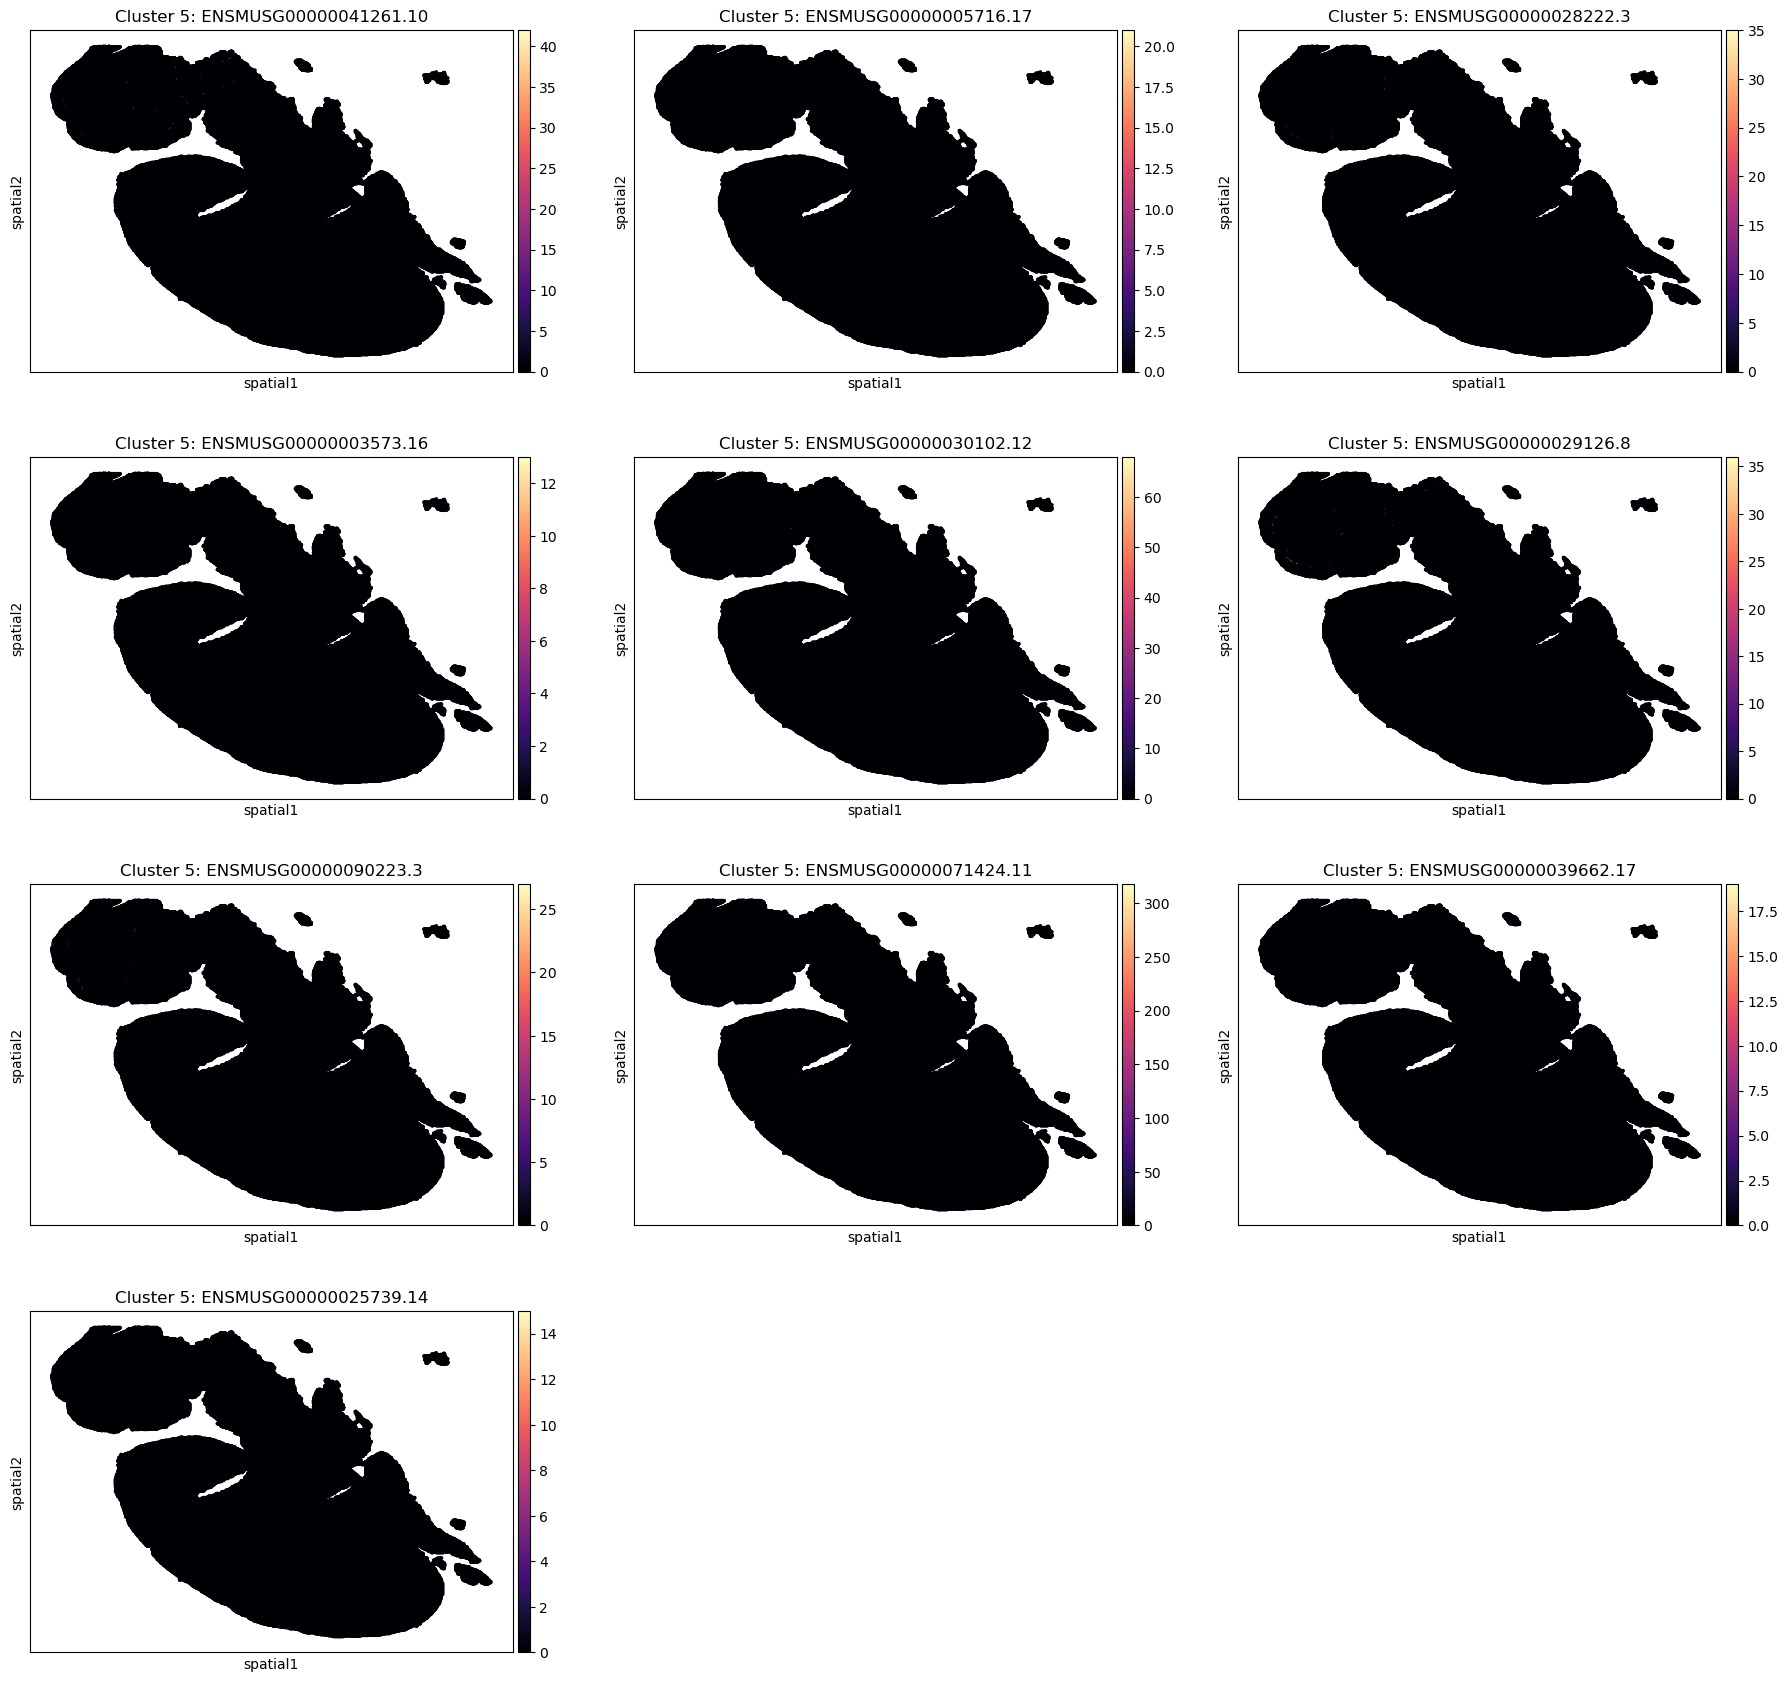

In [55]:
# 例如，可视化cluster '0' 的前3个标记基因
cluster_to_plot = '5'
genes_to_plot = markers_dict[cluster_to_plot]
sc.pl.embedding(adata, basis="spatial", color=genes_to_plot, ncols=3, size=15, title=[f"Cluster {cluster_to_plot}: {g}" for g in genes_to_plot], color_map='magma')

前5个基因的映射关系：
ENSMUSG00000000001.5 -> Gnai3
ENSMUSG00000000003.16 -> Pbsn
ENSMUSG00000000028.16 -> Cdc45
ENSMUSG00000000031.19 -> H19
ENSMUSG00000000037.18 -> Scml2
Cluster 1 top markers: ['Lrrc17', 'Spidr', 'Catsperd', 'Bc1', 'Otoa', 'Vps8', 'mt-Tv', 'Gm36264', 'Tbc1d22b', 'Plp1']
Cluster 2 top markers: ['Nrgn', 'Camk2n1', 'Atp1a1', 'Camk2a', 'Rab3a', 'Ppp3r1', 'Slc17a7', 'Cck', 'Lingo1', 'Olfm1']
Cluster 3 top markers: ['Ddn', 'Fibcd1', 'Spink8', 'Lrrc10b', 'Ndnf', 'Gm41031', 'Myoc', 'Oaf', 'Sp8', 'Htr3a']
Cluster 4 top markers: ['Lrrc17', 'Tmsb4x', 'Nrgn', 'Stmn1', 'Calm1', 'Calm2', 'Slc17a7', 'Rab3a', 'Ncald', 'Tuba1a']
Cluster 5 top markers: ['Car8', 'Pvalb', 'Calb1', 'Homer3', 'Itpr1', 'Nsg1', 'Pcp4', 'Grid2', 'Icmt', 'Gng13']
Cluster 6 top markers: ['Cbln3', 'Kcnd2', 'Chn2', 'Kcnip4', 'Rn18s-rs5', 'Cbln1', 'Adcy1', 'Snap25', 'Zic1', 'Cmss1']
Cluster 7 top markers: ['Malat1', 'Rn18s-rs5', 'Cmss1', 'Gphn', 'Meg3', 'Lars2', 'Cdk8', 'Snhg11', 'Camk1d', 'Gm19951']
Cluster 8 top markers

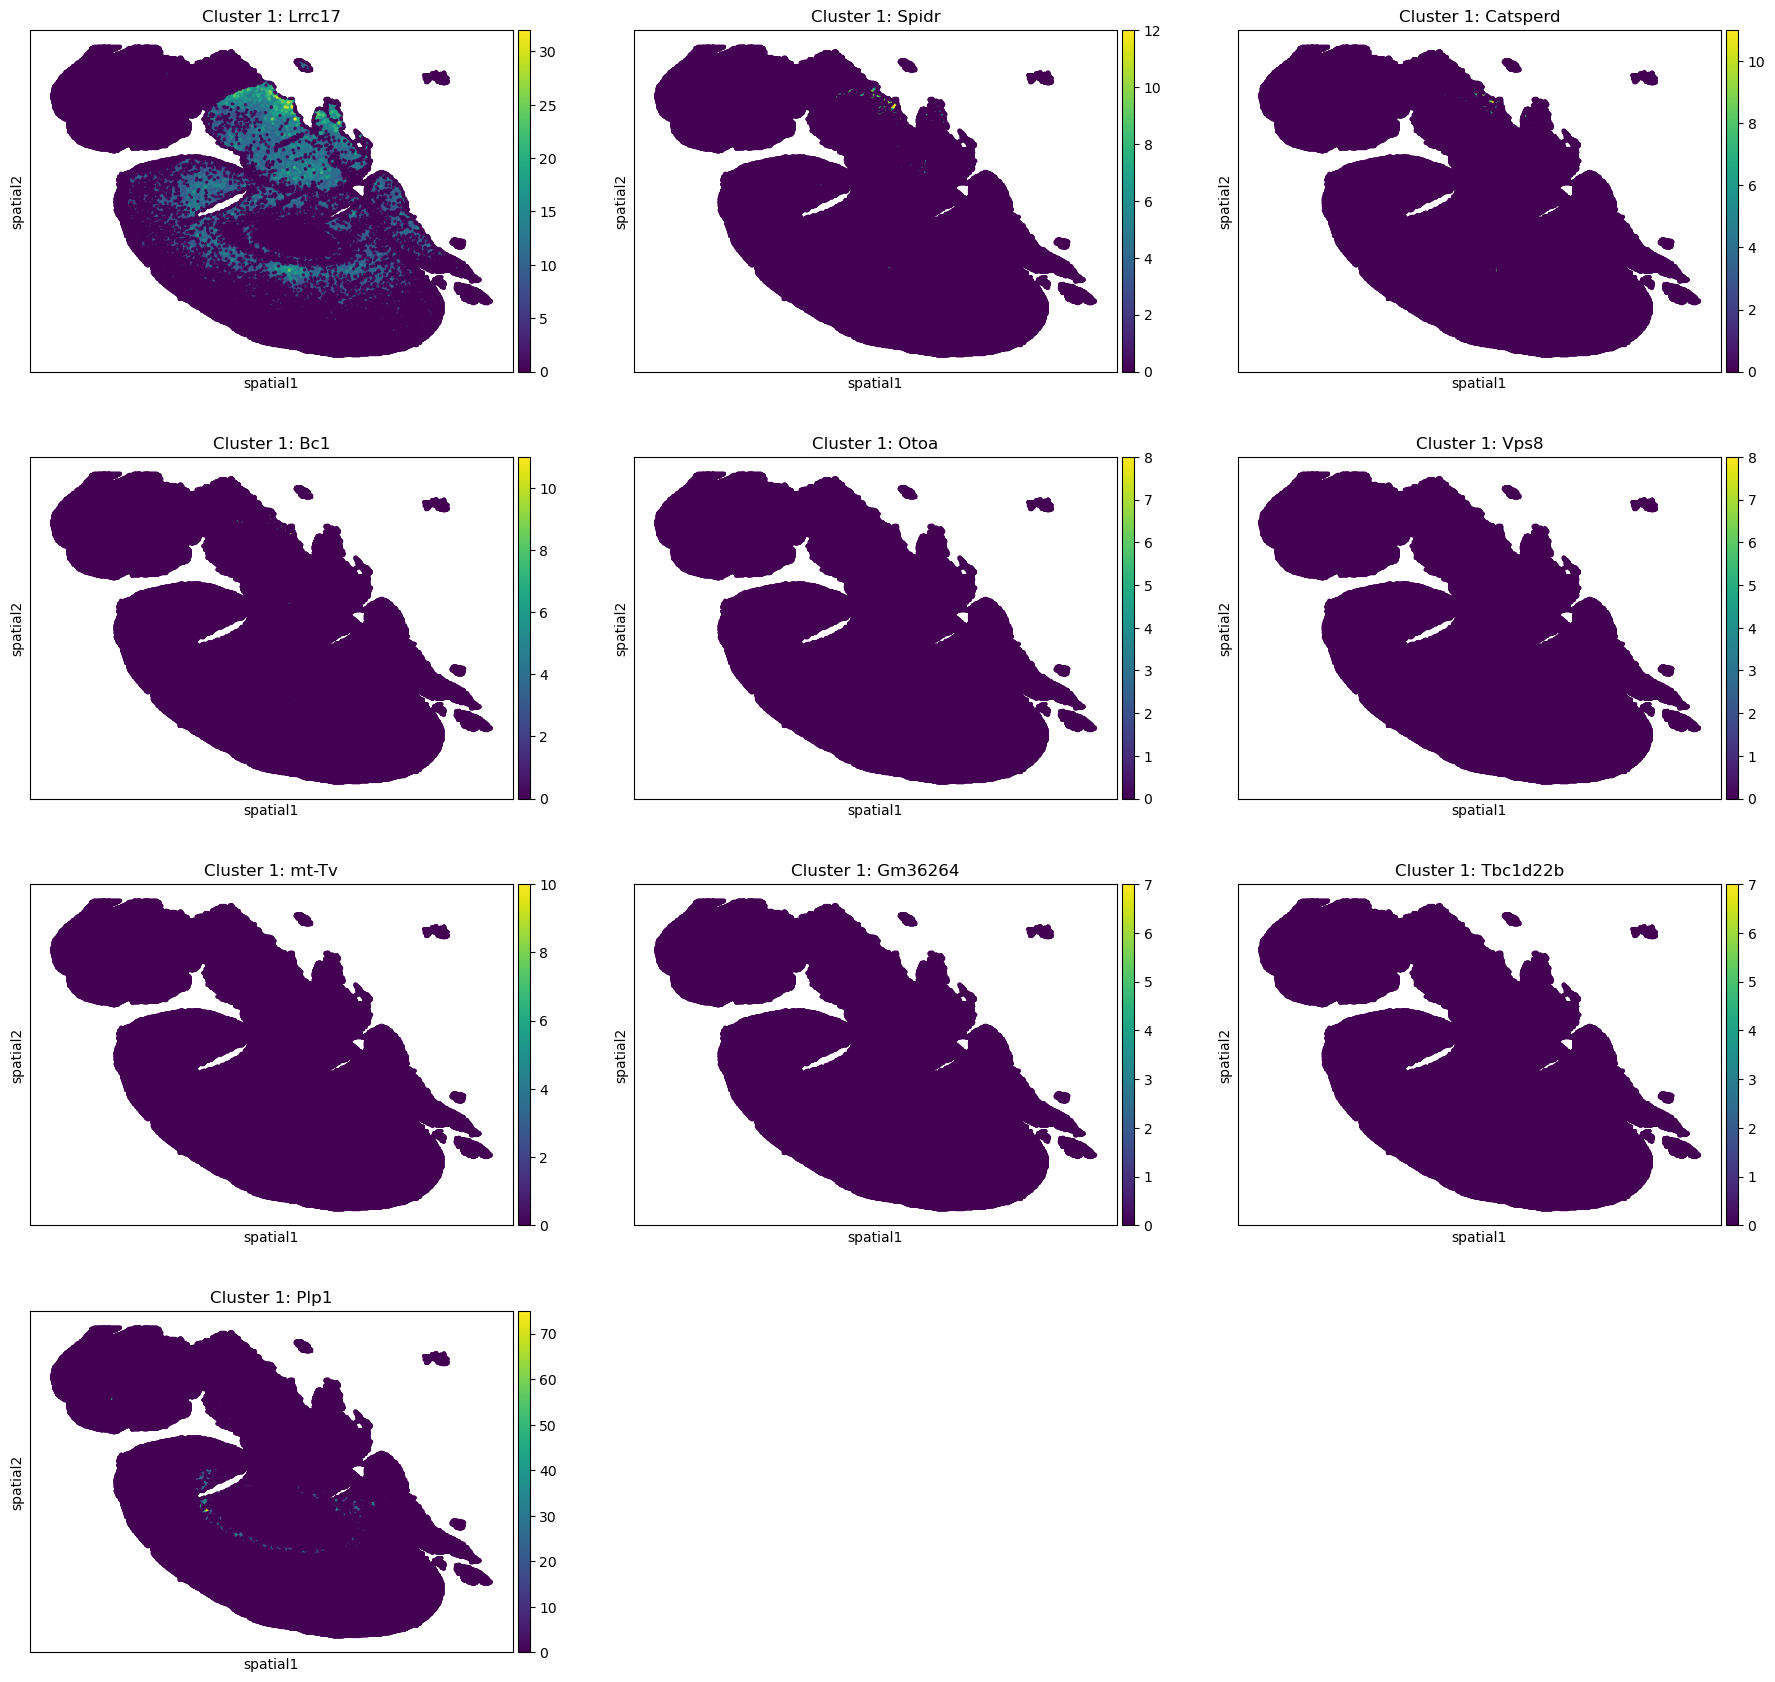

In [59]:
# 方法1：直接从rank_genes_groups结果中提取并转换

# 创建Ensembl ID到真实基因名称的映射字典
ensembl_to_gene = dict(zip(adata.var_names, adata.var['real_gene_name']))

# 检查映射是否正确
print("前5个基因的映射关系：")
for i, (ensembl, gene_name) in enumerate(ensembl_to_gene.items()):
    if i < 5:
        print(f"{ensembl} -> {gene_name}")

markers_dict_real = {}
n_top_genes = 10  # 每个cluster选取前3个marker基因

for cluster_id in adata.obs['leiden'].cat.categories:
    # 获取差异表达结果
    de_df = pd.DataFrame({
        'names': adata.uns['rank_genes_groups']['names'][cluster_id],
        'scores': adata.uns['rank_genes_groups']['scores'][cluster_id],
        'logfoldchanges': adata.uns['rank_genes_groups']['logfoldchanges'][cluster_id],
        'pvals': adata.uns['rank_genes_groups']['pvals'][cluster_id],
        'pvals_adj': adata.uns['rank_genes_groups']['pvals_adj'][cluster_id]
    })
    
    # 取前n_top_genes个基因，并转换为真实基因名称
    top_ensembl_genes = de_df['names'].head(n_top_genes).tolist()
    top_real_genes = [ensembl_to_gene.get(gene, gene) for gene in top_ensembl_genes]
    
    markers_dict_real[cluster_id] = top_real_genes

# 打印结果
for cluster, genes in markers_dict_real.items():
    print(f"Cluster {cluster} top markers: {genes}")


# 可视化特定cluster的marker基因（使用真实基因名称）
cluster_to_plot = '1'  # 举例，选择cluster 0
genes_to_plot = markers_dict_real[cluster_to_plot]

# 由于scanpy绘图函数需要原始的var_names（Ensembl ID），我们需要先找到对应的Ensembl ID
ensembl_genes_to_plot = []
for gene_name in genes_to_plot:
    # 在real_gene_name列中查找对应的Ensembl ID
    matches = adata.var[adata.var['real_gene_name'] == gene_name]
    if not matches.empty:
        ensembl_id = matches.index[0]
        ensembl_genes_to_plot.append(ensembl_id)
    else:
        print(f"警告: 未找到基因 {gene_name} 对应的Ensembl ID")

# 使用Ensembl ID进行绘图，但设置标题显示真实基因名称
sc.pl.embedding(adata, basis="spatial", color=ensembl_genes_to_plot, ncols=3, 
                title=[f"Cluster {cluster_to_plot}: {gene}" for gene in genes_to_plot], 
                s=20, color_map='viridis')

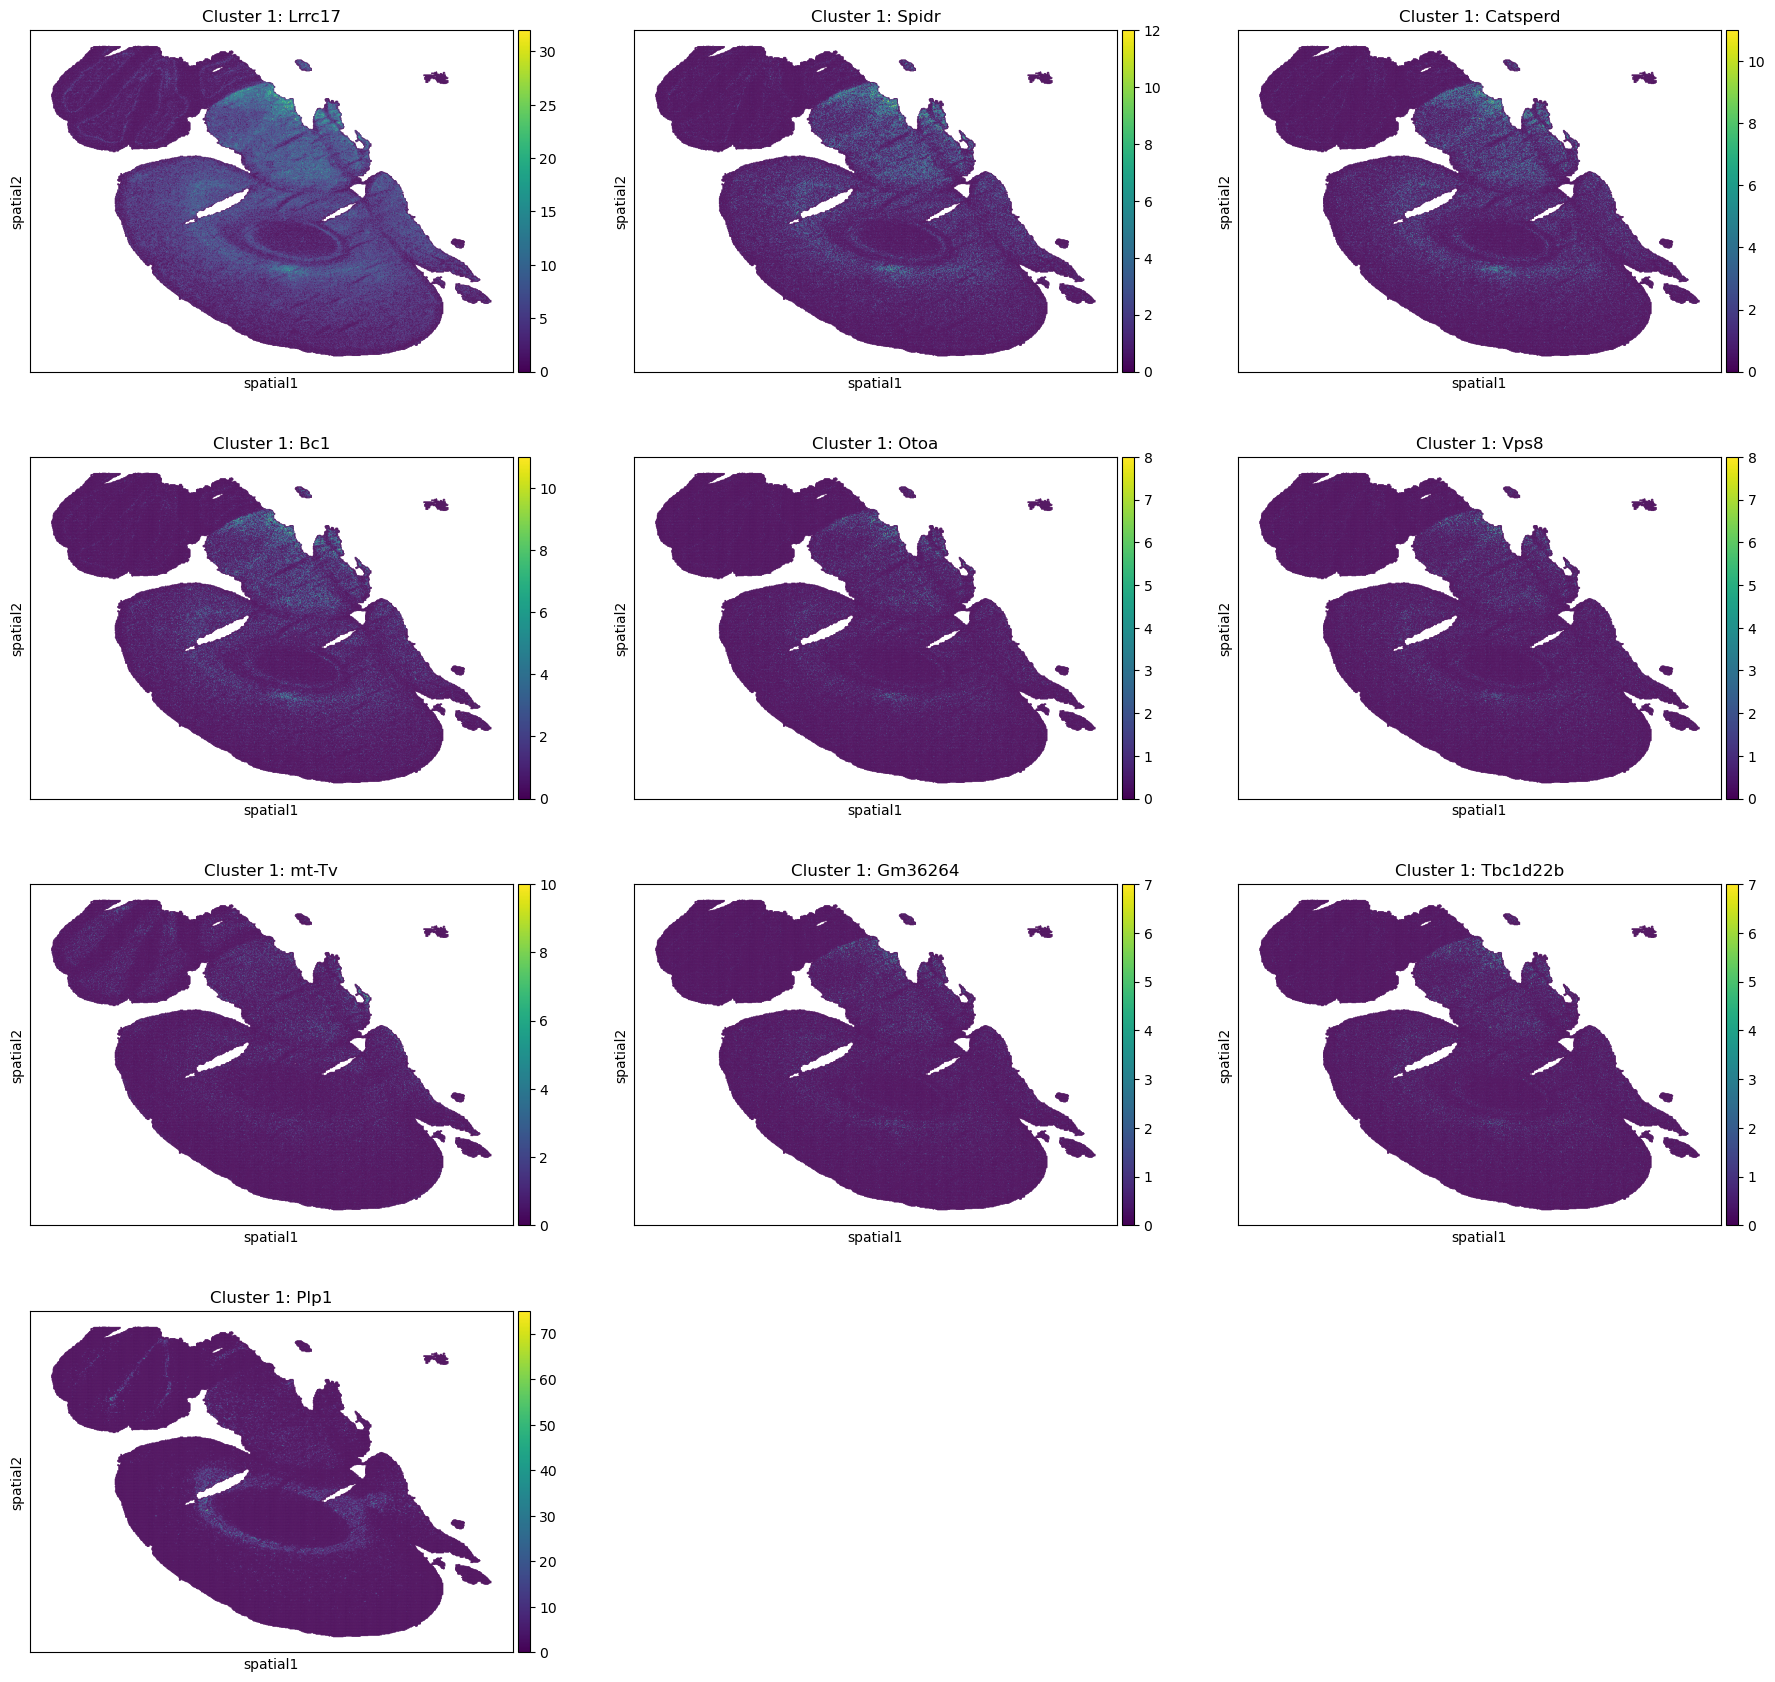

In [74]:
cluster_to_plot = '1'  # 举例，选择cluster 0
genes_to_plot = markers_dict_real[cluster_to_plot]
# genes_to_plot = ['Pcp4']
# 由于scanpy绘图函数需要原始的var_names（Ensembl ID），我们需要先找到对应的Ensembl ID
ensembl_genes_to_plot = []
for gene_name in genes_to_plot:
    # 在real_gene_name列中查找对应的Ensembl ID
    matches = adata.var[adata.var['real_gene_name'] == gene_name]
    if not matches.empty:
        ensembl_id = matches.index[0]
        ensembl_genes_to_plot.append(ensembl_id)
    else:
        print(f"警告: 未找到基因 {gene_name} 对应的Ensembl ID")
        
sc.pl.embedding(adata, basis="spatial", color=ensembl_genes_to_plot, ncols=3, 
                title=[f"Cluster {cluster_to_plot}: {gene}" for gene in genes_to_plot], 
                s=1, color_map='viridis')

In [58]:
ensembl_genes_to_plot

['ENSMUSG00000041261.10', 'ENSMUSG00000005716.17', 'ENSMUSG00000028222.3']

## Fullscope QC

In [22]:
#revo
cidsegfls = list.files("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/Fqsegment/",full.names = T,
                       pattern = "*fq.summary.tsv")
cidextfls = list.files("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/CIDextract/",full.names = T)
cidmapfls = list.files("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/CIDmapping/",full.names = T)
cidsegfls
samplels = c("ME012_Y00986G1","VM06LP2_Y00985CC","VM11LPT2_B05253E6","VM11LPT6_Y00983LA")
samplels = c("ME012_Y00986G1","VM11LPT6_Y00983LA")
StatEfc = function(cidsegi,cidexti,cidmapi,samplei,group){
    cidsegdf = fread(cidsegi,header = FALSE)
    colnames(cidsegdf) = c("readid_old","readid","start","end","strand")
    cidextdf = fread(cidexti,header = FALSE)
    colnames(cidextdf) = c("readid","strand","pos","type","cidseq")
    cidmapdf = fread(cidmapi,header = TRUE)
    cidsegn = nrow(cidsegdf)
    cidextn = length(unique(cidextdf$readid))
    cidmapn = length(unique(cidmapdf$readid))
    qcst1 = data.frame("step" = c("Segments","CIDextract","CIDmap"),
                   "seqnum" = c(cidsegn,cidextn,cidmapn),
                   group = group,sample = samplei)
    qcst1$prop = qcst1$seqnum/qcst1$seqnum[1]
    qcst1$prop[3] = qcst1$seqnum[3]/qcst1$seqnum[2]
    return(qcst1)
}
qcst = NULL
for(i in c(1,4)){
    qcsti = StatEfc(cidsegfls[i],cidextfls[i],cidmapfls[i],samplels[i],"Revo")
    qcst = rbind(qcst,qcsti)
}
qcst

[1] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/Fqsegment//ME012_Y00986G1_revo_freg_251128.fq.summary.tsv"   
[2] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/Fqsegment//VM06LP2_Y00985CC_revo_freg_251128.fq.summary.tsv" 
[3] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/Fqsegment//VM11LPT2_B05253E6_revo_freg_251128.fq.summary.tsv"
[4] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/Fqsegment//VM11LPT6_Y00983LA_revo_freg_251128.fq.summary.tsv"

step,seqnum,group,sample,prop
<chr>,<int>,<chr>,<chr>,<dbl>
Segments,36466187,Revo,ME012_Y00986G1,1.0000000
CIDextract,34633253,Revo,ME012_Y00986G1,0.9497361
CIDmap,31178676,Revo,ME012_Y00986G1,0.9002526
Segments,38813051,Revo,NA,1.0000000
CIDextract,36099586,Revo,NA,0.9300889
CIDmap,31386938,Revo,NA,0.8694542


In [42]:
qcst.ont = NULL
group = "Direct-ONT"
samplei = "VM11LPT6_Y00983LA"
cidsegn = 40226240/8
cidexti = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/ONT/CIDextract/VM11LPT6_Y00983LA_precise_ont_cidextract_251128.tsv"
cidmapi = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/ONT/CIDmap/VM11LPT6_Y00983LA_precise"
cidextdf = fread(cidexti,header = FALSE)
colnames(cidextdf) = c("readid","strand","pos","type","cidseq")
cidmapdf = fread(cidmapi,header = TRUE)
# cidsegn = nrow(cidsegdf)
cidextn = length(unique(cidextdf$readid))
cidmapn = length(unique(cidmapdf$readid))
qcst1 = data.frame("step" = c("Segments","CIDextract","CIDmap"),
                   "seqnum" = c(cidsegn,cidextn,cidmapn),
                   group = group,sample = samplei)
qcst1$prop = qcst1$seqnum/qcst1$seqnum[1]
qcst1$prop[3] = qcst1$seqnum[3]/qcst1$seqnum[2]


samplei = "ME01T2_Y00986G1"
cidsegn = 26700456/4
cidexti = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/ONT/CIDextract/ME01T2_Y00986G1_precise_ont_cidextract_251128.tsv"
cidmapi = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/ONT/CIDmap/ME01T2_Y00986G1_precise"
cidextdf = fread(cidexti,header = FALSE)
colnames(cidextdf) = c("readid","strand","pos","type","cidseq")
cidmapdf = fread(cidmapi,header = TRUE)
# cidsegn = nrow(cidsegdf)
cidextn = length(unique(cidextdf$readid))
cidmapn = length(unique(cidmapdf$readid))
qcst2 = data.frame("step" = c("Segments","CIDextract","CIDmap"),
                   "seqnum" = c(cidsegn,cidextn,cidmapn),
                   group = group,sample = samplei)
qcst2$prop = qcst2$seqnum/qcst2$seqnum[1]
qcst2$prop[3] = qcst2$seqnum[3]/qcst2$seqnum[2]
qcst.ont = rbind(qcst1,qcst2)
qcst.ont

step,seqnum,group,sample,prop
<chr>,<dbl>,<chr>,<chr>,<dbl>
Segments,5028280,Direct-ONT,VM11LPT6_Y00983LA,1.0000000
CIDextract,4167716,Direct-ONT,VM11LPT6_Y00983LA,0.8288552
CIDmap,892721,Direct-ONT,VM11LPT6_Y00983LA,0.2141991
Segments,6675114,Direct-ONT,ME01T2_Y00986G1,1.0000000
CIDextract,6260410,Direct-ONT,ME01T2_Y00986G1,0.9378731
CIDmap,4630829,Direct-ONT,ME01T2_Y00986G1,0.7397006


In [29]:
qcst$group = "Fullscope-Pacbio"
statt = rbind(qcst.ont,qcst)
statt

step,seqnum,group,sample,prop
<chr>,<dbl>,<chr>,<chr>,<dbl>
Segments,10056560,Direct-ONT,VM11LPT6_Y00983LA,1.0000000
CIDextract,4167716,Direct-ONT,VM11LPT6_Y00983LA,0.4144276
CIDmap,892721,Direct-ONT,VM11LPT6_Y00983LA,0.2141991
Segments,6675114,Direct-ONT,ME01T2_Y00986G1,1.0000000
CIDextract,6260410,Direct-ONT,ME01T2_Y00986G1,0.9378731
CIDmap,4630829,Direct-ONT,ME01T2_Y00986G1,0.7397006
Segments,36466187,Fullscope-Pacbio,ME012_Y00986G1,1.0000000
CIDextract,34633253,Fullscope-Pacbio,ME012_Y00986G1,0.9497361
CIDmap,31178676,Fullscope-Pacbio,ME012_Y00986G1,0.9002526


In [44]:
statt = qcst
write.csv(statt,"processed_data/VM_analysis/cid_summary_efficient_25_12_11.csv",quote = F, row.names = F)

## Build fullscope data

In [19]:
bambufls = list.files("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/Bambu/",full.names = T,pattern = "*anno.qs")
bambufls
readtransi = qread(bambufls[1])
head(readtransi)

[1] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/Bambu//VM06LP2_Y00985CC_revo_bambu_annotations_trans_total_anno.qs" 
[2] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/Bambu//VM11LPT2_B05253E6_revo_bambu_annotations_trans_total_anno.qs"
[3] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/Bambu//VM11LPT6_Y00983LA_revo_bambu_annotations_trans_total_anno.qs"

,readid,tranid,type,sample,transcript_id,gene_id
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,read_8256229|Noadapter,42265,equal,VM06LP2_Y00985CC_revo,XM_005539524.2,SH3BP5L
2,read_9422741|adapterL|1-696(+),96484,equal,VM06LP2_Y00985CC_revo,XM_015451379.1,LOC107129936
3,read_9525051|adapterH|1-398(+),96484,equal,VM06LP2_Y00985CC_revo,XM_015451379.1,LOC107129936
4,read_9768805|adapterC-adapterD|947-1545(+),96484,equal,VM06LP2_Y00985CC_revo,XM_015451379.1,LOC107129936
5,read_8397338|adapterE_RC-adapterF_RC|1737-2333(-),96484,equal,VM06LP2_Y00985CC_revo,XM_015451379.1,LOC107129936
6,read_4152430|adapterL_RC|2101-3900(-),42274,equal,VM06LP2_Y00985CC_revo,XM_005539536.2,LOC102124750


In [69]:
cidmapfls = list.files("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/CIDmapping/",full.names = T)
cidmapfls

[1] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/CIDmapping//ME012_Y00986G1_cidmap_251128.tsv"   
[2] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/CIDmapping//VM06LP2_Y00985CC_cidmap_251128.tsv" 
[3] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/CIDmapping//VM11LPT2_B05253E6_cidmap_251128.tsv"
[4] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/CIDmapping//VM11LPT6_Y00983LA_cidmap_251128.tsv"

In [70]:
cidmapfls = list.files("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/CIDmapping/",full.names = T)
bambufls = list.files("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/Bambu/",full.names = T,pattern = "*anno.qs")
samplels = c("ME012_Y00986G1","VM06LP2_Y00985CC","VM11LPT2_B05253E6","VM11LPT6_Y00983LA")
outfile = paste0("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/",samplels,"_trans_total_anno_withcid_25_11_28.qs")
gtfdfant.kn = read.csv("downstream_analysis/ref/gtf_filter_final_with_newname_25_10_09.csv")
#load cid map and transcript anno for pacbio
library(data.table)
for(i in 1:length(samplels[1])){
    cidmapdf = fread(cidmapfls[i],header = TRUE)
    readtransi = qread(bambufls[i])
    readtransi = merge(readtransi,cidmapdf[,c("readid","cidPos")])
    readtransi$x = as.numeric(MySplit(readtransi$cidPos,"_",1))
    readtransi$y = as.numeric(MySplit(readtransi$cidPos,"_",2))
    qsave(readtransi,outfile[i])
}
head(readtransi)

,readid,tranid,type,sample,transcript_id,gene_id,cidPos,x,y
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,read_1|adapterH-adapterI|2681-4523(+),90059,compatible,ME012_Y00986G1_revo,XM_015444954.1,ARPP21,8230_12924,8230,12924
2,read_1|adapterH-adapterI|2681-4523(+),90068,compatible,ME012_Y00986G1_revo,XM_015444963.1,ARPP21,8230_12924,8230,12924
3,read_1|adapterH-adapterI|2681-4523(+),90058,compatible,ME012_Y00986G1_revo,XM_015444953.1,ARPP21,8230_12924,8230,12924
4,read_1|adapterH-adapterI|2681-4523(+),45686,compatible,ME012_Y00986G1_revo,XM_005545487.2,ARPP21,8230_12924,8230,12924
5,read_1|adapterH-adapterI|2681-4523(+),90062,compatible,ME012_Y00986G1_revo,XM_015444957.1,ARPP21,8230_12924,8230,12924
6,read_1|adapterH-adapterI|2681-4523(+),90070,compatible,ME012_Y00986G1_revo,XM_015444965.1,ARPP21,8230_12924,8230,12924


In [24]:
samplels = c("VM11LPT6_Y00983LA","VM06LP2_Y00985CC","VM11LPT2_B05253E6")
cidmapfls = paste0("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/ONT/CIDmap/",samplels,"_precise")
bambufls = paste0("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/ONT/Bambu/",samplels,pattern = "_ont_bambu_annotations_trans_total_anno.qs")

In [25]:
#ONT
outfile = paste0("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/ONT/",samplels,"_trans_total_anno_withcid_25_11_28.qs")
gtfdfant.kn = read.csv("downstream_analysis/ref/gtf_filter_final_with_newname_25_10_09.csv")
#load cid map and transcript anno for pacbio
library(data.table)
for(i in 1:1){
    cidmapdf = fread(cidmapfls[i],header = TRUE)
    readtransi = qread(bambufls[i])
    readtransi = merge(readtransi,cidmapdf[,c("readid","cidPos")])
    readtransi$x = as.numeric(MySplit(readtransi$cidPos,"_",1))
    readtransi$y = as.numeric(MySplit(readtransi$cidPos,"_",2))
    qsave(readtransi,outfile[i])
}
head(readtransi)

,readid,tranid,type,sample,transcript_id,gene_id,cidPos,x,y
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,00003ea6-f1f3-41b1-bc52-86bcbb2362d5,66773,compatible,VM11LPT6_Y00983LA_ont,XM_005581605.2,ELAVL2,16455_7386,16455,7386
2,00003ea6-f1f3-41b1-bc52-86bcbb2362d5,66773,compatible,VM11LPT6_Y00983LA_ont,XM_005581605.2,ELAVL2,16455_7386,16455,7386
3,00003ea6-f1f3-41b1-bc52-86bcbb2362d5,66771,compatible,VM11LPT6_Y00983LA_ont,XM_005581603.2,ELAVL2,16455_7386,16455,7386
4,00003ea6-f1f3-41b1-bc52-86bcbb2362d5,66771,compatible,VM11LPT6_Y00983LA_ont,XM_005581603.2,ELAVL2,16455_7386,16455,7386
5,00003ea6-f1f3-41b1-bc52-86bcbb2362d5,66772,compatible,VM11LPT6_Y00983LA_ont,XM_005581604.2,ELAVL2,16455_7386,16455,7386
6,00003ea6-f1f3-41b1-bc52-86bcbb2362d5,66772,compatible,VM11LPT6_Y00983LA_ont,XM_005581604.2,ELAVL2,16455_7386,16455,7386


In [27]:
readtransls

[1] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ME012_Y00986G1_trans_total_anno_withcid_25_11_28.qs"   
[2] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/VM06LP2_Y00985CC_trans_total_anno_withcid_25_11_28.qs" 
[3] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/VM11LPT2_B05253E6_trans_total_anno_withcid_25_11_28.qs"
[4] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/VM11LPT6_Y00983LA_trans_total_anno_withcid_25_11_28.qs"

In [28]:
#tissue filter
samplels = c("ME012_Y00986G1","VM06LP2_Y00985CC","VM11LPT2_B05253E6","VM11LPT6_Y00983LA")
tsgefls = paste0("/cluster/home/liuhengxin/rawdata/Macaque_VM/ref/",samplels,".tissue.gef")
readtransls = paste0("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/",samplels,
                    "_trans_total_anno_withcid_25_11_28.qs")
for(i in 3:4){
    tsgefdf = fread(tsgefls[i],header = T)
    tsgefdf = unique(tsgefdf[,c("x","y")])
    tsgefdf$cidpos = paste0(tsgefdf$x,"_",tsgefdf$y)
    readtransi = qread(readtransls[i])
    readtransi$cidpos = paste0(readtransi$x,"_",readtransi$y)
    print(nrow(readtransi))
    readtransi = readtransi[readtransi$cidpos %in% tsgefdf$cidpos,]
    print(nrow(readtransi))
    qsave(tsgefdf,paste0("/cluster/home/liuhengxin/rawdata/Macaque_VM/ref/",samplels[i],".coord.tissue.gef"))
    qsave(readtransi,paste0("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/",
                            samplels[i],"_trans_total_anno_withcid_filter_25_11_28.qs"))
}


[1] 45323742
[1] 35244251
[1] 42401051
[1] 33253792


## Case debug

In [65]:
#debug bambu
#bambu annotation
.libPaths(c("/cluster/home/liuhengxin/software/miniconda3_2/envs/r-kernel/lib/R/library",
           "/cluster/home/liuhengxin/software/miniconda3/envs/r4.1.2/lib/R/library",
           "/cluster/home/liuhengxin/software/miniconda3_2/envs/Rsplot/lib/R/library"))
library(bambu)
library(qs)
OuttablefromBambu = function(readtrans,sample){
    readtransf = readtrans[(lengths(readtrans$compatibleMatches) + lengths(readtrans$equalMatches)) > 0,]
    nrow(readtransf)
    rtnume = lengths(readtransf$equalMatches)
    rtnumc = lengths(readtransf$compatibleMatches)
    readid = rep(readtransf$readId,rtnume)
    tranid = unlist(readtransf$equalMatches)

    readtransf.dfe = data.frame("readid" = readid,
                              "tranid" = tranid,
                               "type" = "equal")
    readid = rep(readtransf$readId,rtnumc)
    tranid = unlist(readtransf$compatibleMatches)

    readtransf.dfc = data.frame("readid" = readid,
                              "tranid" = tranid,
                               "type" = "compatible")
    readtransf.dfc = readtransf.dfc[!readtransf.dfc$readid %in% readtransf.dfe$readid,]
    readtransf.df = rbind(readtransf.dfe,readtransf.dfc)
    readtransf.df = readtransf.df[!duplicated(readtransf.df[,1:3]),]
    readtransf.df$sample = sample
    return(readtransf.df)
}

BambuMatrixBuild = function(bamls,bambuAnnotations,genome,outfile,samples){
    se <- bambu(reads = c(bamls), 
                annotations = bambuAnnotations, 
                genome = genome,NDR = 0.3,
               trackReads = TRUE)
    se
    qsave(se,file = paste0(outfile,"_se.qs"))
    
    readtransf.df = NULL
    for(i in 1:length(metadata(se)$readToTranscriptMaps)){
        readtransf.dfi = OuttablefromBambu(metadata(se)$readToTranscriptMaps[[i]],samples[i])
        readtransf.df = rbind(readtransf.df,readtransf.dfi)
    }
    sean = as.data.frame(rowData(se))
    sean = sean[,c("TXNAME","GENEID","txid")]
    colnames(sean) = c("transcript_id","gene_id","txid")
    matchid = match(readtransf.df$tranid,sean$txid)
    readtransf.df$transcript_id = sean$transcript_id[matchid]
    readtransf.df$gene_id = sean$gene_id[matchid]
    print(length(unique(readtransf.df$readid)))
    qsave(readtransf.df,file = paste0(outfile,"_trans_total_anno.qs"))
    return(readtransf.df)
}

# 解析参数
gtf <- "/cluster/home/liuhengxin/P1_brain_nanopore/ref/bambu_extended_annotations_novelname.gtf"
genome <- "/cluster/home/liuhengxin/P1_brain_nanopore/ref/GCF_000364345.1_Macaca_fascicularis_5.0_genomic.fa"
bamls <- "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/Alignment/VM11LPT2_B05253E6_revo_251128.sorted.bam"
outfile <- "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/Bambu/VM11LPT2_B05253E6_revo_bambu_annotations_ndr0.3"
samples <- "VM11LPT2_B05253E6"

bambuAnnotations <- prepareAnnotations(gtf)
readtransf.df = BambuMatrixBuild(bamls,bambuAnnotations,genome,outfile,samples)
head(readtransf.df)

Detected Bambu derived annotations in the annotations. Set a new prefix with opt.discovery(list(prefix='newPrefix')) to prevent ambigious id assignment.

--- Start generating read class files ---

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    BioCsoft: https://bioconductor.org/packages/3.18/bioc
    BioCann: https://bioconductor.org/packages/3.18/data/annotation
    BioCexp: https://bioconductor.org/packages/3.18/data/experiment
    BioCworkflows: https://bioconductor.org/packages/3.18/workflows
    BioCbooks: https://bioconductor.org/packages/3.18/books
    CRAN: https://cran.r-project.org

Detected 2 warnings across the samples during read class construction. Access warnings with metadata(bambuOutput)$warnings

--- Start extending annotations ---

Warning message:
"There was 1 warning in `summarise()`.
ℹ In argument: `intersectWidth = max(intersectWidth)`.
Caused by warn

[1] 15423809


,readid,tranid,type,sample,transcript_id,gene_id
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,read_254800|adapterL-adapterM|2560-3351(+),40523,equal,VM11LPT2_B05253E6,PGBD2-WeiLab-1,PGBD2
2,read_7830524|adapterC_RC|5619-8482(-),23462,equal,VM11LPT2_B05253E6,BambuGene6239-WeiLab-1,BambuGene6239
3,read_5465556|adapterL_RC-adapterM_RC|1855-4127(-),42483,equal,VM11LPT2_B05253E6,XM_005539510.2,PGBD2
4,read_362250|adapterK_RC-adapterL_RC|2180-4329(-),42487,equal,VM11LPT2_B05253E6,XM_005539516.2,ZNF692
5,read_8162766|adapterO|1-3319(+),42488,equal,VM11LPT2_B05253E6,XM_005539517.2,ZNF672
6,read_6151085|adapterM|1-1222(+),42489,equal,VM11LPT2_B05253E6,XM_005539518.2,ZNF672


In [5]:
rt_vm116 = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/VM11LPT6_Y00983LA_trans_total_anno_withcid_filter_25_12_02.qs")
rt_vm062 = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/VM06LP2_Y00985CC_trans_total_anno_withcid_filter_25_12_02.qs")
rt_vm112 = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/VM11LPT2_B05253E6_trans_total_anno_withcid_filter_25_12_02.qs")
rt_me01 = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ME012_Y00986G1_trans_total_anno_withcid_filter_25_12_02.qs")

In [77]:
gtfdfant.kn = read.csv("downstream_analysis/ref/gtf_filter_final_with_newname_25_10_09.csv")
FilterFsraw = function(rt_vm116){
    rt_vm116.equal = rt_vm116[rt_vm116$type == "equal",]
    rt_vm116.cmp = rt_vm116[rt_vm116$type != "equal",]
    rt_vm116.cmp = rt_vm116.cmp[!rt_vm116.cmp$readid %in% rt_vm116.equal$readid,]
    rt_vm116 = rbind(rt_vm116.cmp,rt_vm116.equal)
    rt_vm116 = rt_vm116[rt_vm116$transcript_id %in% gtfdfant.kn$transnew,]
    rt_vm116$transcript_id = gtfdfant.kn[match(rt_vm116$transcript_id,gtfdfant.kn$transnew),]$transnew2
    return(rt_vm116)
}
rt_vm116 = FilterFsraw(rt_vm116)
qsave(rt_vm116,file = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/VM11LPT6_Y00983LA_trans_total_anno_withcid_filter_25_12_02.qs")
rt_vm062 = FilterFsraw(rt_vm062)
qsave(rt_vm062,file = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/VM06LP2_Y00985CC_trans_total_anno_withcid_filter_25_12_02.qs")
rt_vm112 = FilterFsraw(rt_vm112)
qsave(rt_vm112,file = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/VM11LPT2_B05253E6_trans_total_anno_withcid_filter_25_12_02.qs")
rt_me01 = FilterFsraw(rt_me01)
qsave(rt_me01,file = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ME012_Y00986G1_trans_total_anno_withcid_filter_25_12_02.qs")

outpath = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/VM1106"
MakeBackdata = function(rt_vm116,outpath){
    library(alphahull)
    backp.vm116 = unique(rt_vm116[,c("x","y")])
    qsave(backp.vm116,file = paste0(outpath,"_backpoint_12_02.qs"))

    myalpha = ashape(unique(backp.vm116[sample(1:nrow(backp.vm116),200000),c("x","y")]),alpha = 50)
    areaedgei = as.data.frame(myalpha$edges)
    qsave(areaedgei,file = paste0(outpath,"_areaedge_density_12_02.qs"))
}
MakeBackdata(rt_vm062,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/VM0602")
MakeBackdata(rt_vm112,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/VM1102")
MakeBackdata(rt_me01,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/ME01")

In [15]:
#case plot
BuildPlotBed = function(npclf,nanobed,groupname,geneex,sigtr = NULL){
    readgroup = npclf[npclf$gene_id == geneex,]
    # readgroup = readgroup[readgroup$arealayer %in% paste0("l",1:6),]
    readgroup = unique(readgroup[c("readid","transcript_id","gene_id",
                                   groupname)])
    # readgroup = readgroup %>% group_by(readid) %>% 
    #   mutate(transgroup = 
    #            paste(unique(transcript_id)[order(unique(transcript_id))],
    #                              collapse = "|"))
    readgrt = nanobed[nanobed$name %in% readgroup$readid,]
    readgrt$group = readgroup[match(readgrt$name,
                                    readgroup$readid),
                              groupname]
    # readgrt$transcript_id = readgroup[match(readgrt$name,readgroup$readid),
    #                                   "transcript_id"]
    # readgrt$transgroup = readgroup[match(readgrt$name,readgroup$readid),
    #                                   "transgroup"]
    
    grtdfl = as.data.frame(readgrt)
    colnames(grtdfl)[ncol(grtdfl)] = "group"
    colnames(grtdfl)[6] = "readid"
    grtdfl = merge(grtdfl,readgroup[c("readid",
                              "transcript_id")],
          by = "readid")
    grtdfl = grtdfl[order(grtdfl$transcript_id,
                          grtdfl$start,grtdfl$end),]
    grtdfl = grtdfl[!is.na(grtdfl$group) &
                      grtdfl$group != "",]
    grtdfl
    grtdfl$readord = paste0(grtdfl$transcript_id,"-",grtdfl$readid)
    grtdfl = grtdfl %>% group_by(group) %>% 
      mutate(orid = as.numeric(factor(readord,
                                      levels = unique(readord)))) %>%
      mutate(oridnorm = orid/max(orid))
    grtdfl$sig = "black"
    grtdfl[grtdfl$group %in% sigtr, "sig"] = "red"
    return(grtdfl)
}

IsoformReadPlot = function(gtfp, grtdfl, geneex, onlyhub = T,mycolor = NULL){
    library(randomcoloR)
    library(ggbio)
    library(ggtranscript)
    tartrans = gtfp[which(gtfp$gene_id == geneex),]
    tartrans = as.data.frame(tartrans)
    tartrans = tartrans[tartrans$type == "exon",]
    tartrans = tartrans[order(tartrans$transcript_id),]
    tartrans$orid = as.numeric(factor(tartrans$transcript_id,levels = unique(tartrans$transcript_id)))
    tartrans$group = NA
    if(onlyhub){
      grtdfl = grtdfl %>% group_by(readid) %>% filter(length(unique(transcript_id)) == 1)
      grtdfl$readord = paste0(grtdfl$transcript_id,"-",grtdfl$readid)
      grtdfl = grtdfl %>% group_by(group) %>% 
        mutate(orid = as.numeric(factor(readord,
                                        levels = unique(readord)))) %>%
        mutate(oridnorm = orid/max(orid))
      tartrans = tartrans[tartrans$transcript_id %in% grtdfl$transcript_id,]
    }
    # tartrans = merge(tartrans,unique(grtdfl[c("transcript_id",
    #                                           "transgroup")]),
    #                  by = "transcript_id")
    tartranstx = tartrans %>% group_by(transcript_id,orid) %>% 
      summarise(start = min(start),end = max(end))
    tartranstx$group = NA
    mylim = c(min(tartranstx$start)-1000,max(tartranstx$end)+1000)
    library(ggh4x)
    
    #facetcol = list()
    #facetcoldf = unique(grtdfl[c("group","sig")])
    #facetcoldf = facetcoldf[order(facetcoldf$group,decreasing = F),]
    #for (i in 1:nrow(facetcoldf)) {
    #  facetcol[[i]] = element_text(color = facetcoldf[i,]$sig)
    #}
    #facetcol[[nrow(facetcoldf)+1]] = element_text(color = "black")
    grtdflin = to_intron(grtdfl,
                     "readord")
    no_of_colors = length(unique(grtdfl$transcript_id)) 
    colorful_palette = distinctColorPalette(no_of_colors) 
    names(colorful_palette) = unique(grtdfl$transcript_id)
    if(!is.null(mycolor)){
        colorful_palette = mycolor
    }

    
    pc = ggplot(grtdfl,aes(x = start,xend = end,
                      y = orid,
                      yend = orid,
                      fill = transcript_id,color = transcript_id)) +
      geom_segment(size = 0.5) +
      geom_segment(data = grtdflin,
                   aes(x = start,xend = end,
                       y = orid,
                       yend = orid),
                   size = 0.03,alpha = 0.5,color = "grey") +
      geom_range(data = tartrans,
                 aes(xstart = start,xend = end,
                     y = orid,
                     fill = transcript_id,color = transcript_id),
                 size = 0.2) +
      geom_intron(data = to_intron(tartrans,
                                   "transcript_id"),
                  aes(xstart = start,xend = end,strand = strand),
                  size = 0.2,,color = "grey",
                  arrow.min.intron.length = 200,
                  arrow = arrow(length=unit(0.3,"cm"))) +
      geom_text(data = tartranstx,
                aes(x = (start + end) / 2,y = orid,
                    label = transcript_id),
                size = 3, vjust = -0.1, color = "black") +
     # facet_grid2(group~.,scales = "free",
     #             strip = strip_themed(
     #               text_y = facetcol
    #            )) +
      facet_wrap(group~.,scales = "free",ncol = 1,strip.position = "top") +
      scale_x_continuous(limits = mylim)+
      scale_color_manual(values = colorful_palette) +
      scale_fill_manual(values = colorful_palette) +
      # scale_fill_discreterainbow() +
      # scale_color_discreterainbow() +
      theme_void() + 
      ggtitle(geneex) +
      theme(legend.position = "none",
            panel.spacing = unit(0,'lines'),
            strip.background = element_rect(fill = NA,color = NA),
           strip.placement = "outside",
           plot.title = element_text(hjust = 0.5))
    pc
    
    return(pc)
}
#fsraw.cor = fsraw[fsraw$layer %in% paste0("l",1:6),]
#
IsoformReadPlotTotal = function(fsraw,isosigi,longbed,gtf,geneex,hubtrans = NULL,onlyhub = F,mycolors =NULL){
    transname = unique(isosigi[isosigi$gene_id %in% geneex,]$transcript_id)
    if(!is.null(hubtrans)){
        transname = hubtrans
    }
    if(is.null(mycolors)){
        mycolors = distinctColorPalette(length(transname))
        names(mycolors) = transname
    }
    grtdfl = BuildPlotBed(fsraw,longbed,'areatr',geneex,NULL)
    grtdfl = grtdfl[grtdfl$transcript_id %in% transname,]
    
    pci1 = IsoformReadPlot(gtf, grtdfl, geneex,onlyhub,mycolors)
    pci1
    return(pci1)
}

CaseCountPlotBox = function(fsraw,geneex,transname,mycolors = NULL){
    npcase1 = fsraw[fsraw$gene_id == geneex,]
    npcase1 = npcase1[npcase1$transcript_id %in% transname,]
    if(is.null(mycolors)){
        mycolors = distinctColorPalette(length(unique(npcase1$transcript_id)))
    }
    npcase1 = npcase1 %>% 
        group_by(areatr,chunk) %>%
        mutate(genecount = length(unique(readid))) %>% 
        filter(genecount > 10) %>%
        group_by(areatr,chunk,transcript_id) %>%
        summarise(count = length(unique(readid)),genecount = genecount[1])
    npcase1 = npcase1[npcase1$areatr != "",]
    
    npcase1$rate = npcase1$count/npcase1$genecount

    npcase1$transid = as.numeric(as.factor(npcase1$transcript_id))
    npcase1$cmpgroup = paste0(substr(npcase1$transid,1,1),
                            "-",npcase1$areatr)
    comparisons = list()
    classid = as.character(unique(npcase1$areatr))
    n = 1
    for(i in 1:length(classid)){
        for(j in (i+1):length(classid)){
            comparisons[[n]] = c(classid[i],classid[j])
            n = n + 1
        }
    }
    
    npcase1m = npcase1 %>% group_by(areatr,transcript_id) %>% summarise(mean = mean(rate))
    
    pci2 = ggplot(npcase1,
                  aes(x = areatr, y = rate, color = transcript_id)) +
      geom_boxplot() +
      geom_point(data = npcase1m,aes(x = areatr, y = mean,
                                    color = transcript_id),
                 position = position_dodge(0.75)) +
      # geom_line(data = npcase1m,aes(x = areatr, y = mean,
      #                              group = transcript_id),
      #           position = position_dodge(0.75)) +
      stat_compare_means(label = "p.signif",hide.ns = T,method = "t.test",vjust = 0.7,ref.group = ".all.") + 
      scale_color_manual(values = mycolors) +
      theme_pubr() + 
    theme(axis.text.x = element_text(angle = 45,vjust = 0.5)) +
    xlab("") + ylab("Isoform read ratio")
    return(pci2)
}

CasePlotTotalClass = function(fsraw,isosigi,gtf,geneex,hubtrans = NULL,markdfb,edgesdf){
    transname = unique(isosigi[isosigi$gene_id %in% geneex,]$transcript_id)
    if(!is.null(hubtrans)){
        transname = hubtrans
    }
    mycolors = distinctColorPalette(length(transname))
    print(mycolors)
    names(mycolors) = transname
    grtdfl = BuildPlotBed(fsraw,longbed,'areatr',geneex,NULL)
    print(head(grtdfl))
    grtdfl = grtdfl[grtdfl$transcript_id %in% transname,]
    
    pci1 = IsoformReadPlot(gtf, grtdfl, geneex,onlyhub = F,mycolors)
    pci1
#ggexport(p0c1,filename = "processed/figures/f3/bambu_cell_case_NNvsNeuron_CDC42.pdf",
#           width = 6,height = 5)

    npcase1 = fsraw[fsraw$gene_id == geneex,]
    npcase1 = npcase1 %>% 
        group_by(areatr,chunk) %>%
        mutate(genecount = length(unique(readid))) %>% 
        filter(genecount > 10) %>%
        group_by(areatr,chunk,transcript_id) %>%
        summarise(count = length(unique(readid)),genecount = genecount[1])
    npcase1 = npcase1[npcase1$areatr != "",]
    npcase1 = npcase1[npcase1$transcript_id %in% transname,]
    npcase1$rate = npcase1$count/npcase1$genecount

    npcase1$transid = as.numeric(as.factor(npcase1$transcript_id))
    npcase1$cmpgroup = paste0(substr(npcase1$transid,1,1),
                            "-",npcase1$areatr)
    comparisons = list()
    classid = as.character(unique(npcase1$areatr))
    n = 1
    for(i in 1:length(classid)){
        for(j in (i+1):length(classid)){
            comparisons[[n]] = c(classid[i],classid[j])
            n = n + 1
        }
    }


    
    npcase1m = npcase1 %>% group_by(areatr,transcript_id) %>% summarise(mean = mean(rate))
    
#library(ggstatsplot)

    pci2 = ggplot(npcase1,
                  aes(x = areatr, y = rate, color = transcript_id)) +
      geom_boxplot() +
      geom_point(data = npcase1m,aes(x = areatr, y = mean,
                                    color = transcript_id),
                 position = position_dodge(0.75)) +
      geom_line(data = npcase1m,aes(x = areatr, y = mean,
                                   group = transcript_id),
                position = position_dodge(0.75)) +
      stat_compare_means(label = "p.signif",hide.ns = T,method = "t.test",vjust = 0.7,ref.group = ".all.") + 
      scale_color_manual(values = mycolors) +
      theme_pubr() + xlab("") + ylab("Isoform read ratio")

    pci3 = MarkerSpPlot(fsraw.cor,markdfb,geneex,hubtrans,edgesdf,200)
    #pci3 = MarkerSpPlot(fsrawdp.cell,fsrawdp.cellb,geneex,mycolors,hubtrans)
    
    pci = ggarrange(ggarrange(pci1,pci2,widths = c(1.5,2),ncol = 1),pci3,nrow = 1)
    return(pci)
}


In [95]:
longbed = import("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/Alignment/VM11LPT6_Y00983LA_revo_251128.sorted.bed", format = "BED")
# head(longbed)
# longbed = import("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/Alignment/VM11LPT2_B05253E6_revo_251128.sorted.bed", format = "BED")
# head(longbed)
gtf = rtracklayer::import("ref/bambu_extended_annotations_novelname.gtf")

In [16]:
PlotSp = function(markdfb,markdf,areaedges,ptsize,areaalpha = 0.1){
    pi = ggplot() +scattermore::geom_scattermore(
        data = markdfb,
        aes(x,y),
        color = "white",
        # pixels = raster.dpi,
        pointsize = 0.1
      ) +
      geom_segment(data = areaedges, aes(x = x1, y = y1, xend = x2, yend = y2),
                 size = 0.5,color = "white",alpha = areaalpha) + 
      geom_point(data = markdf,
                 aes(x,y,color = transcript_id),
                 size = ptsize) + 
      # facet_wrap(~gene_id,nrow = 2) +
      theme_void() + 
      scale_color_discreterainbow() +
      theme_presentation() + 
      theme(legend.position = "top",legend.title = element_blank(),
            legend.text = element_text(size = 10)) +
      guides(color = guide_legend(override.aes = list(size=8),
                                  nrow = 2),
            size = "none") +
      scale_y_reverse()
    return(pi)
}


In [63]:
backp.vm116 = unique(rt_vm116[,c("x","y")])
qsave(backp.vm116,file = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/VM1106_backpoint_12_02.qs")
library(alphahull)
myalpha = ashape(unique(backp.vm116[sample(1:nrow(backp.vm116),200000),c("x","y")]),alpha = 50)
areaedgei = as.data.frame(myalpha$edges)
qsave(areaedgei,file = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/VM1106_areaedge_density105_12_02.qs")

In [25]:
nrow(backp.vm116)

[1] 9066136

In [70]:
library(alphahull)
myalpha = ashape(unique(backp.vm116[sample(1:nrow(backp.vm116),100000),c("x","y")]),alpha = 80)
areaedgei = as.data.frame(myalpha$edges)
qsave(areaedgei,file = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/VM1106_areaedge_density105_12_02.qs")

In [73]:
areaedgei = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/VM1106_areaedge.qs")

In [84]:
genehub = "DDRGK1"
transhub = c("XM_005568473.2","DDRGK1-FS-1")
fsraw.case = rt_vm116[rt_vm116$gene_id == genehub & rt_vm116$transcript_id %in% transhub,]
fsraw.case = fsraw.case %>% group_by(readid) %>% mutate(transn = length(unique(transcript_id)))
fsraw.case[fsraw.case$transn >1, ]$transcript_id = "ambi"
fsraw.case = fsraw.case[fsraw.case$transn == 1,]
pcase = PlotSp(backp.vm116,fsraw.case,areaedgei,0.5,0.1)
pcase
ggexport(pcase,filename = paste0("downstream_analysis/result/figure_revision/VM116_layer_dtu_case",genehub,"_25_12_02.pdf"),width = 5,height = 5)

genehub = "ARPP21"
transhub = c("XM_005545496.2","XM_005545480.2","XM_015444956.1")
fsraw.case = rt_vm116[rt_vm116$gene_id == genehub & rt_vm116$transcript_id %in% transhub,]
fsraw.case = fsraw.case %>% group_by(readid) %>% mutate(transn = length(unique(transcript_id)))
fsraw.case[fsraw.case$transn >1, ]$transcript_id = "ambi"
fsraw.case = fsraw.case[fsraw.case$transn == 1,]
pcase = PlotSp(backp.vm116,fsraw.case,areaedgei,0.5,0.1)
ggexport(pcase,filename = paste0("downstream_analysis/result/figure_revision/VM116_layer_dtu_case",genehub,"_25_12_02.pdf"),width = 5,height = 5)

genehub = "ARPP19"
transhub = c("NM_001283415.1","XM_015452432.1")
fsraw.case = rt_vm116[rt_vm116$gene_id == genehub & rt_vm116$transcript_id %in% transhub,]
fsraw.case = fsraw.case %>% group_by(readid) %>% mutate(transn = length(unique(transcript_id)))
fsraw.case[fsraw.case$transn >1, ]$transcript_id = "ambi"
fsraw.case = fsraw.case[fsraw.case$transn == 1,]
fsraw.case = fsraw.case[order(fsraw.case$transcript_id,decreasing = T),]
pcase = PlotSp(backp.vm116,fsraw.case,areaedgei,0.5,0.1)
ggexport(pcase,filename = paste0("downstream_analysis/result/figure_revision/VM116_layer_dtu_case",genehub,"_25_12_02.pdf"),width = 5,height = 5)

genehub = "DBNDD2"
transhub = c("XM_005569136.2","XM_015429879.1")
fsraw.case = rt_vm116[rt_vm116$gene_id == genehub & rt_vm116$transcript_id %in% transhub,]
fsraw.case = fsraw.case %>% group_by(readid) %>% mutate(transn = length(unique(transcript_id)))
fsraw.case[fsraw.case$transn >1, ]$transcript_id = "ambi"
fsraw.case = fsraw.case[fsraw.case$transn == 1,]
fsraw.case = fsraw.case[order(fsraw.case$transcript_id,decreasing = T),]
pcase = PlotSp(backp.vm116,fsraw.case,areaedgei,0.5,0.1)
ggexport(pcase,filename = paste0("downstream_analysis/result/figure_revision/VM116_layer_dtu_case",genehub,"_25_12_02.pdf"),width = 5,height = 5)

genehub = "MYL6"
transhub = c("MYL6-FS-1","MYL6-FS-2")
fsraw.case = rt_vm116[rt_vm116$gene_id == genehub & rt_vm116$transcript_id %in% transhub,]
fsraw.case = fsraw.case %>% group_by(readid) %>% mutate(transn = length(unique(transcript_id)))
fsraw.case[fsraw.case$transn >1, ]$transcript_id = "ambi"
fsraw.case = fsraw.case[fsraw.case$transn == 1,]
fsraw.case = fsraw.case[order(fsraw.case$transcript_id,decreasing = T),]
pcase = PlotSp(backp.vm116,fsraw.case,areaedgei,0.5,0.1)
ggexport(pcase,filename = paste0("downstream_analysis/result/figure_revision/VM116_layer_dtu_case",genehub,"_25_12_02.pdf"),width = 5,height = 5)


Warning message in plot_theme(plot):
"The `panel.margin` theme element is not defined in the element hierarchy."
file saved to downstream_analysis/result/figure_revision/VM116_layer_dtu_caseMYL6_25_12_02.pdf



In [21]:

HubCasePlot = function(rt_vm116,backp.vm116,areaedgei,sample){
    genehub = "DDRGK1"
    transhub = c("XM_005568473.2","DDRGK1-FS-1")
    fsraw.case = rt_vm116[rt_vm116$gene_id == genehub & rt_vm116$transcript_id %in% transhub,]
    fsraw.case = fsraw.case %>% group_by(readid) %>% mutate(transn = length(unique(transcript_id)))
    fsraw.case[fsraw.case$transn >1, ]$transcript_id = "ambi"
    fsraw.case = fsraw.case[fsraw.case$transn == 1,]
    pcase = PlotSp(backp.vm116,fsraw.case,areaedgei,0.5,0.1)
    pcase
    ggexport(pcase,filename = paste0("downstream_analysis/result/figure_revision/",sample,"_layer_dtu_case_",
                                     genehub,"_25_12_02.pdf"),width = 5,height = 5)
    
    genehub = "ARPP19"
    transhub = c("NM_001283415.1","XM_015452432.1")
    fsraw.case = rt_vm116[rt_vm116$gene_id == genehub & rt_vm116$transcript_id %in% transhub,]
    fsraw.case = fsraw.case %>% group_by(readid) %>% mutate(transn = length(unique(transcript_id)))
    fsraw.case[fsraw.case$transn >1, ]$transcript_id = "ambi"
    fsraw.case = fsraw.case[fsraw.case$transn == 1,]
    fsraw.case = fsraw.case[order(fsraw.case$transcript_id,decreasing = T),]
    pcase = PlotSp(backp.vm116,fsraw.case,areaedgei,0.5,0.1)
    ggexport(pcase,filename = paste0("downstream_analysis/result/figure_revision/",sample,"_layer_dtu_case_",
                                     genehub,"_25_12_02.pdf"),width = 5,height = 5)
    genehub = "DBNDD2"
    transhub = c("XM_005569136.2","XM_015429879.1")
    fsraw.case = rt_vm116[rt_vm116$gene_id == genehub & rt_vm116$transcript_id %in% transhub,]
    fsraw.case = fsraw.case %>% group_by(readid) %>% mutate(transn = length(unique(transcript_id)))
    fsraw.case[fsraw.case$transn >1, ]$transcript_id = "ambi"
    fsraw.case = fsraw.case[fsraw.case$transn == 1,]
    fsraw.case = fsraw.case[order(fsraw.case$transcript_id,decreasing = T),]
    pcase = PlotSp(backp.vm116,fsraw.case,areaedgei,0.5,0.1)
    ggexport(pcase,filename = paste0("downstream_analysis/result/figure_revision/",sample,"_layer_dtu_case_",
                                     genehub,"_25_12_02.pdf"),width = 5,height = 5)
    genehub = "MYL6"
    transhub = c("MYL6-FS-1","MYL6-FS-2")
    fsraw.case = rt_vm116[rt_vm116$gene_id == genehub & rt_vm116$transcript_id %in% transhub,]
    fsraw.case = fsraw.case %>% group_by(readid) %>% mutate(transn = length(unique(transcript_id)))
    fsraw.case[fsraw.case$transn >1, ]$transcript_id = "ambi"
    fsraw.case = fsraw.case[fsraw.case$transn == 1,]
    fsraw.case = fsraw.case[order(fsraw.case$transcript_id,decreasing = T),]
    pcase = PlotSp(backp.vm116,fsraw.case,areaedgei,0.5,0.1)
    ggexport(pcase,filename = paste0("downstream_analysis/result/figure_revision/",sample,"_layer_dtu_case_",
                                     genehub,"_25_12_02.pdf"),width = 5,height = 5)

    genehub = "TUSC3"
    transhub = c("XM_005562645.2","XM_005562646.2")
    fsraw.case = rt_vm116[rt_vm116$gene_id == genehub & rt_vm116$transcript_id %in% transhub,]
    fsraw.case = fsraw.case %>% group_by(readid) %>% mutate(transn = length(unique(transcript_id)))
    fsraw.case[fsraw.case$transn >1, ]$transcript_id = "ambi"
    fsraw.case = fsraw.case[fsraw.case$transn == 1,]
    fsraw.case = fsraw.case[order(fsraw.case$transcript_id,decreasing = T),] 
    pcase = PlotSp(backp.vm116,fsraw.case,areaedgei,0.5,0.1)
    ggexport(pcase,filename = paste0("downstream_analysis/result/figure_revision/",sample,"_layer_dtu_case_",
                                     genehub,"_25_12_02.pdf"),width = 5,height = 5)

    genehub = "IDH3B"
    transhub = c("XM_005568512.1","XM_005568513.1")
    fsraw.case = rt_vm116[rt_vm116$gene_id == genehub & rt_vm116$transcript_id %in% transhub,]
    fsraw.case = fsraw.case %>% group_by(readid) %>% mutate(transn = length(unique(transcript_id)))
    fsraw.case[fsraw.case$transn >1, ]$transcript_id = "ambi"
    fsraw.case = fsraw.case[fsraw.case$transn == 1,]
    fsraw.case = fsraw.case[order(fsraw.case$transcript_id,decreasing = T),]
    pcase = PlotSp(backp.vm116,fsraw.case,areaedgei,0.5,0.1)
    ggexport(pcase,filename = paste0("downstream_analysis/result/figure_revision/",sample,"_layer_dtu_case_",
                                     genehub,"_25_12_02.pdf"),width = 5,height = 5)
}

HubCasePlotOne = function(rt_vm116,backp.vm116,areaedgei,sample,genehub,transhub){
    fsraw.case = rt_vm116[rt_vm116$gene_id == genehub & rt_vm116$transcript_id %in% transhub,]
    fsraw.case = fsraw.case %>% group_by(readid) %>% mutate(transn = length(unique(transcript_id)))
    fsraw.case[fsraw.case$transn >1, ]$transcript_id = "ambi"
    fsraw.case = fsraw.case[fsraw.case$transn == 1,]
    fsraw.case$transcript_id = factor(fsraw.case$transcript_id,levels = transhub)
    pcase = PlotSp(backp.vm116,fsraw.case,areaedgei,0.5,0.1)
    pcase
    ggexport(pcase,filename = paste0("downstream_analysis/result/figure_revision/",sample,"_layer_dtu_case_",
                                     genehub,"_25_12_02.pdf"),width = 5,height = 5)
}

# HubCasePlot(rt_vm116,backp.vm116,areaedgei,"VM1106")
# HubCasePlot(rt_vm112,backp.vm1102,areaedge.vm1102,"VM1102")
# HubCasePlot(rt_vm062,backp.vm0602,areaedge.vm0602,"VM0602")
# HubCasePlot(rt_me01,backp.me01,areaedge.me01,"ME01")
# genehub = "TUBB2B"
# transhub = c("NM_001283898.1","TUBB2B-FS-1")
# genehub = "IDH3B"
# transhub = c("XM_005568513.1","XM_005568512.1")
# HubCasePlotOne(rt_vm116,backp.vm1106,areaedge.vm1106,"VM1106",genehub,transhub)
# HubCasePlotOne(rt_vm112,backp.vm1102,areaedge.vm1102,"VM1102",genehub,transhub)
# HubCasePlotOne(rt_vm062,backp.vm0602,areaedge.vm0602,"VM0602",genehub,transhub)
# HubCasePlotOne(rt_me01,backp.me01,areaedge.me01,"ME01",genehub,transhub)

In [22]:
genehub = "DDRGK1"
transhub = c("DDRGK1-FS-1",
             "XM_005568473.2")
HubCasePlotOne(rt_vm116,backp.vm1106,areaedge.vm1106,"VM1106",genehub,transhub)
HubCasePlotOne(rt_vm112,backp.vm1102,areaedge.vm1102,"VM1102",genehub,transhub)
HubCasePlotOne(rt_vm062,backp.vm0602,areaedge.vm0602,"VM0602",genehub,transhub)
HubCasePlotOne(rt_me01,backp.me01,areaedge.me01,"ME01",genehub,transhub)


Warning message in plot_theme(plot):
"The `panel.margin` theme element is not defined in the element hierarchy."
file saved to downstream_analysis/result/figure_revision/VM1106_layer_dtu_case_DDRGK1_25_12_02.pdf

Warning message in plot_theme(plot):
"The `panel.margin` theme element is not defined in the element hierarchy."
file saved to downstream_analysis/result/figure_revision/VM1102_layer_dtu_case_DDRGK1_25_12_02.pdf

Warning message in plot_theme(plot):
"The `panel.margin` theme element is not defined in the element hierarchy."
file saved to downstream_analysis/result/figure_revision/VM0602_layer_dtu_case_DDRGK1_25_12_02.pdf

Warning message in plot_theme(plot):
"The `panel.margin` theme element is not defined in the element hierarchy."
file saved to downstream_analysis/result/figure_revision/ME01_layer_dtu_case_DDRGK1_25_12_02.pdf



[1] 1226

`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
Warning message:
"Using the `size` aesthetic in this geom was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` in the `default_aes` field and elsewhere instead."
Warning message:
"Removed 51 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 33 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 18 rows containing missing values or values outside the scale range
(`geom_segment()`)."


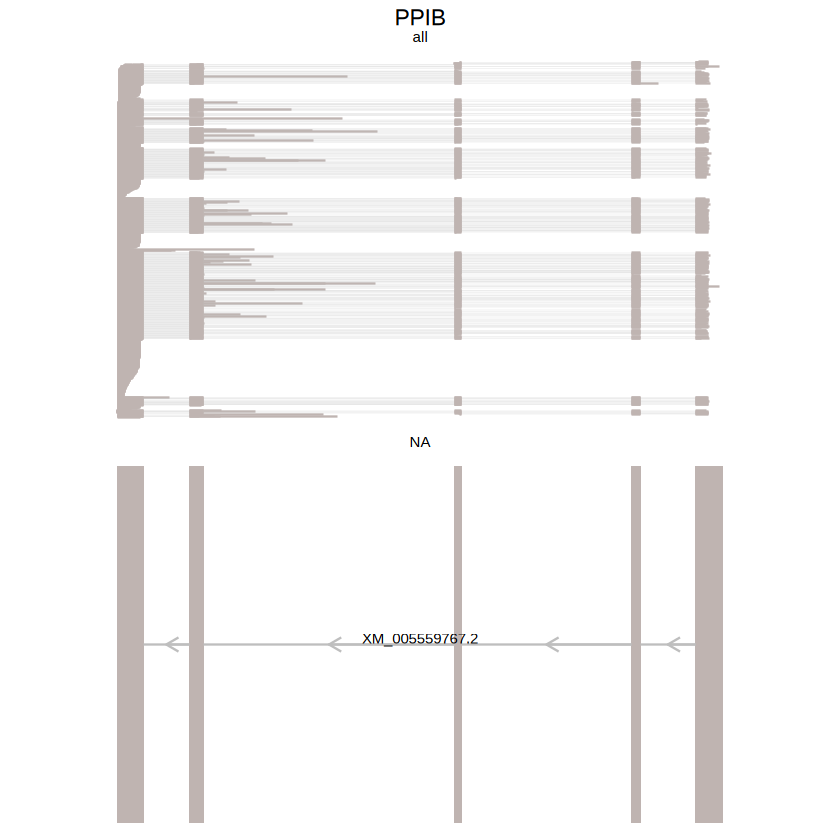

In [100]:
genehub = "PPIB"
# rt_vm116 = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/VM11LPT6_Y00983LA_trans_total_anno_withcid_25_11_28.qs")
fsraw.case = rt_vm116[rt_vm116$gene_id == genehub,]
nrow(fsraw.case)
fsraw.case = fsraw.case %>% group_by(readid) %>% mutate(transn = length(unique(transcript_id)))
fsraw.case[fsraw.case$transn >1, ]$transcript_id = "ambi"
fsraw.case$group = "all"
grtdfl = BuildPlotBed(fsraw.case,longbed,"group",genehub,NULL)
pcmki = IsoformReadPlot(gtf, grtdfl, genehub, onlyhub = F)
pcmki

[1] 1273

`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
Warning message:
"Removed 222 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 120 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 102 rows containing missing values or values outside the scale range
(`geom_segment()`)."


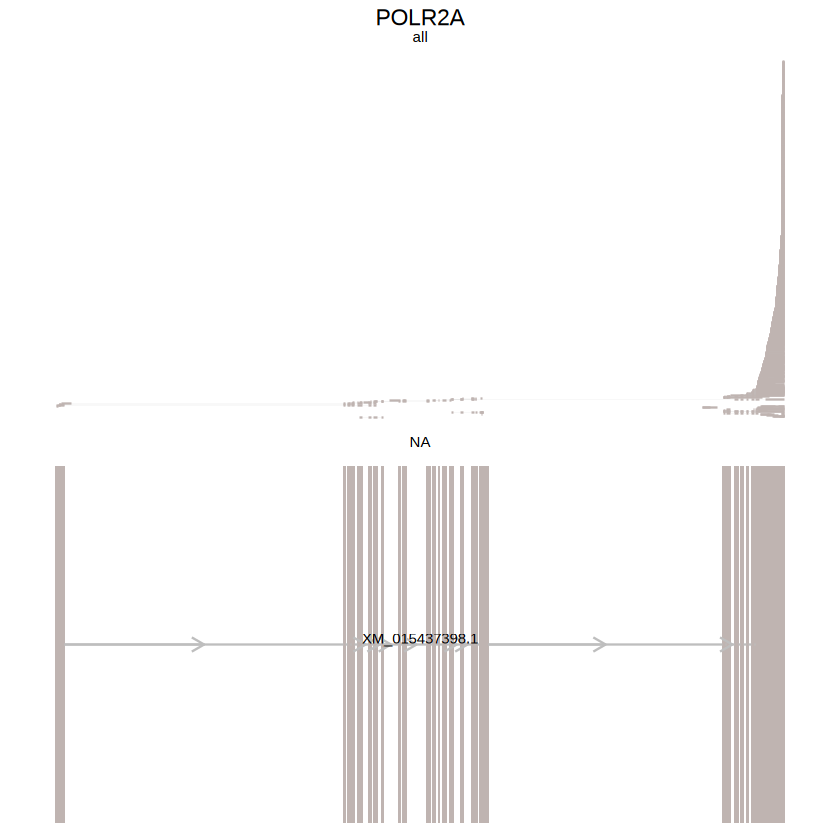

In [102]:
genehub = "POLR2A"
rt_vm116 = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/VM11LPT6_Y00983LA_trans_total_anno_withcid_25_11_28.qs")

fsraw.case = rt_vm116[rt_vm116$gene_id == genehub,]
nrow(fsraw.case)
fsraw.case = fsraw.case %>% group_by(readid) %>% mutate(transn = length(unique(transcript_id)))
fsraw.case[fsraw.case$transn >1, ]$transcript_id = "ambi"
fsraw.case$group = "all"
grtdfl = BuildPlotBed(fsraw.case,longbed,"group",genehub,NULL)
pcmki = IsoformReadPlot(gtf, grtdfl, genehub, onlyhub = F)
pcmki

#### layer case count analysis

In [77]:
l1cv = read.table("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/VM_analysis/Revo/ref/curve_coordinates_vm1106.txt",header = TRUE)
head(l1cv)

,x,y
,<dbl>,<dbl>
1,22372.93,2117.086
2,22279.78,2141.394
3,22187.16,2167.371
4,22095.01,2194.814
5,22003.25,2223.523
6,21911.82,2253.293


In [90]:
genehub = "DDRGK1"
transhub = c("XM_005568473.2","DDRGK1-FS-1")
genehub = "ARPP19"
transhub = c("NM_001283415.1","XM_015452432.1")
genehub = "DBNDD2"
transhub = c("XM_005569136.2","XM_015429879.1")

`summarise()` has grouped output by 'distance_bin', 'gene_id'. You can override
using the `.groups` argument.


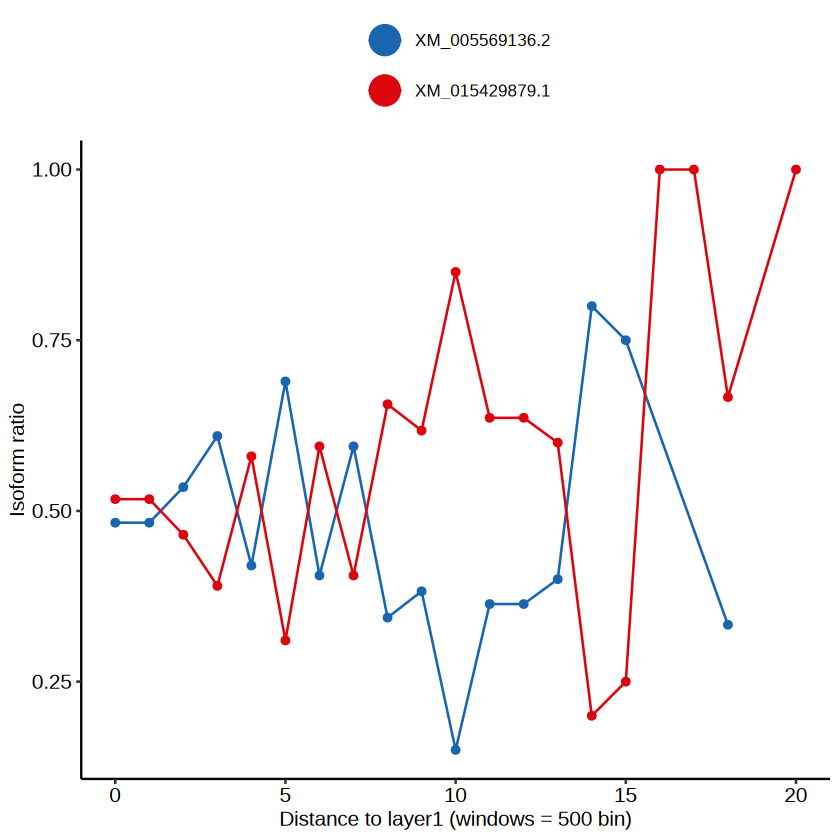

In [94]:
# 假设您有两个data.frame：
fsraw.case = rt_vm116[rt_vm116$gene_id == genehub & rt_vm116$transcript_id %in% transhub,]
fsraw.case = fsraw.case %>% group_by(readid) %>% mutate(transn = length(unique(transcript_id)))
fsraw.case[fsraw.case$transn >1, ]$transcript_id = "ambi"
fsraw.case = fsraw.case[fsraw.case$transn == 1,]
fsraw.case$transcript_id = factor(fsraw.case$transcript_id,levels = transhub)
library(sf)
calculate_point_to_line_distance <- function(points_df, line_df) {
  points_sf <- st_as_sf(points_df, coords = c("x", "y"))
  line_sf <- st_as_sf(line_df, coords = c("x", "y"))
  line_sf <- st_cast(st_combine(line_sf), "LINESTRING")
  distances <- st_distance(points_sf, line_sf)
  points_df$distance_to_line <- as.numeric(distances)
  
  return(points_df)
}
casedis <- calculate_point_to_line_distance(fsraw.case[,c("x","y")], l1cv)
# head(casedis)
fsraw.case = merge(fsraw.case,casedis,by = c("x","y"))
disbin = 500
fsraw.case$distance_bin = as.integer(fsraw.case$distance_to_line/disbin)
disst = fsraw.case %>% group_by(distance_bin,gene_id,transcript_id) %>% 
            summarise(count = n()) %>% group_by(distance_bin) %>% mutate(ratio = count/sum(count))
pi = ggplot(disst,aes(x = distance_bin,y = ratio,color = transcript_id)) +
      geom_point() + 
      geom_line() + 
      theme_pubr() + 
      scale_color_discreterainbow() +
      theme(legend.position = "top",legend.title = element_blank(),
            legend.text = element_text(size = 10)) +
      guides(color = guide_legend(override.aes = list(size=8),
                                  nrow = 2),
            size = "none") + xlab("Distance to layer1 (windows = 500 bin)") + ylab("Isoform ratio")
pi

Warning message in plot_theme(plot):
"The `panel.margin` theme element is not defined in the element hierarchy."


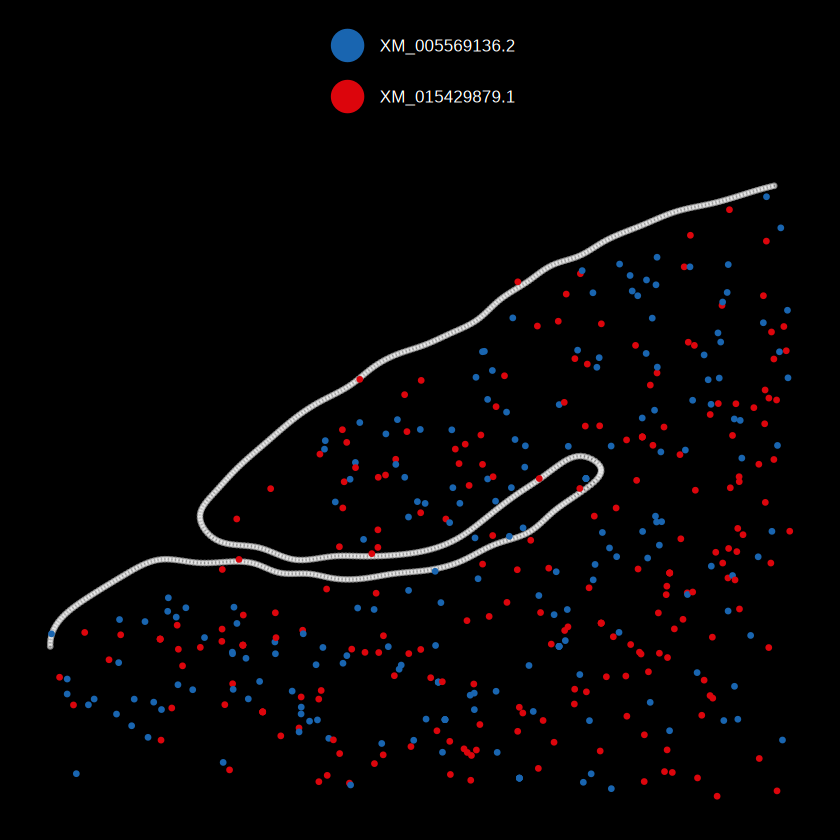

In [93]:
pi = ggplot() +
      geom_point(data = l1cv, aes(x = x, y = y),
                 size = 0.5,color = "white",alpha = 0.5) + 
      geom_point(data = fsraw.case,
                 aes(x,y,color = transcript_id),
                 size = 0.5) + 
      # facet_wrap(~gene_id,nrow = 2) +
      theme_void() + 
      scale_color_discreterainbow() +
      theme_presentation() + 
      theme(legend.position = "top",legend.title = element_blank(),
            legend.text = element_text(size = 10)) +
      guides(color = guide_legend(override.aes = list(size=8),
                                  nrow = 2),
            size = "none") +
      scale_y_reverse()
pi

`summarise()` has grouped output by 'distance_bin', 'gene_id'. You can override
using the `.groups` argument.
file saved to downstream_analysis/result/figure_revision/VM116_layer_dtu_caseDDRGK1_layer1_distance_stat_25_12_16.pdf



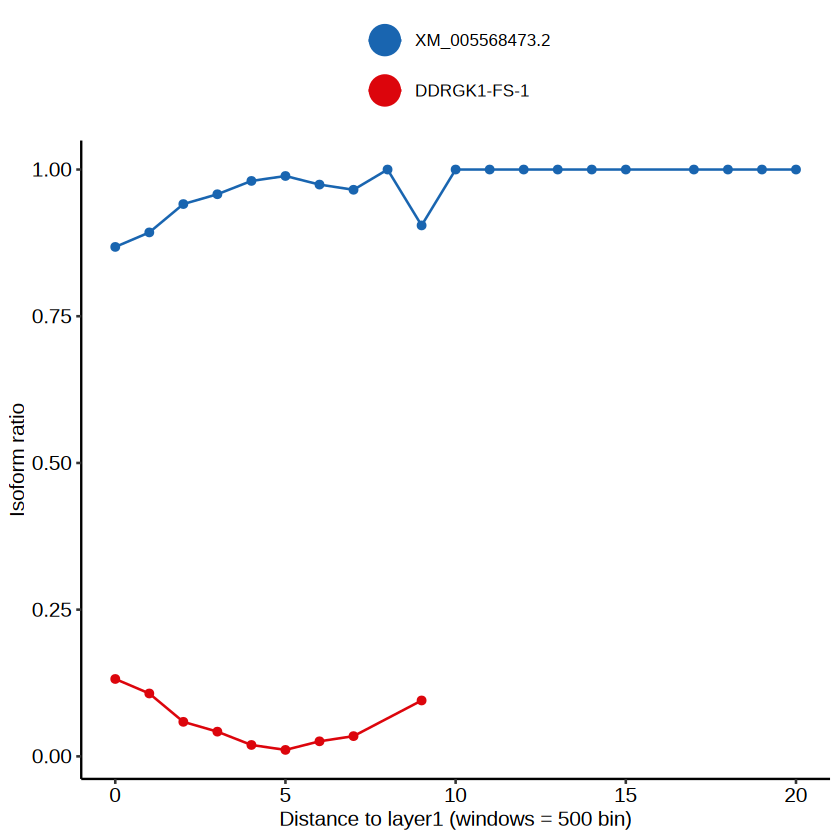

In [84]:
disbin = 500
fsraw.case$distance_bin = as.integer(fsraw.case$distance_to_line/disbin)
disst = fsraw.case %>% group_by(distance_bin,gene_id,transcript_id) %>% 
            summarise(count = n()) %>% group_by(distance_bin) %>% mutate(ratio = count/sum(count))
pi = ggplot(disst,aes(x = distance_bin,y = ratio,color = transcript_id)) +
      geom_point() + 
      geom_line() + 
      theme_pubr() + 
      scale_color_discreterainbow() +
      theme(legend.position = "top",legend.title = element_blank(),
            legend.text = element_text(size = 10)) +
      guides(color = guide_legend(override.aes = list(size=8),
                                  nrow = 2),
            size = "none") + xlab("Distance to layer1 (windows = 500 bin)") + ylab("Isoform ratio")
pi
ggexport(pi,filename = paste0("downstream_analysis/result/figure_revision/VM116_layer_dtu_case",genehub,
                              "_layer1_distance_stat_25_12_16.pdf"),width = 5,height = 5)


## Calculate DTUs between cortex and cerebellum

In [11]:
rt_vm116$areatr = "Cortex"
rt_me01$areatr = "Cerebellum"
fsraw = rbind(rt_vm116,rt_me01)
fsraw = fsraw %>% group_by(readid) %>% filter(length(unique(transcript_id)) == 1)

In [14]:
#calculate DTUs
transtls = list()
FullLengthTranSt = function(fs.info){
      transtl = fs.info %>% group_by(gene_id, areatr) %>% 
        mutate(genecount = length(unique(readid))) %>% 
        group_by(gene_id,transcript_id,areatr) %>% 
        summarise(count = length(unique(readid)),
                  genecount = unique(genecount))
      transtl = transtl[transtl$areatr != "" &
                          !is.na(transtl$areatr),]
      return(transtl)
}

CalSigIsoform = function(transt){
    transt = transt[!is.na(transt$areatr),]
    transt = transt[transt$areatr != "",]
    transt$relative = transt$count/transt$genecount
    #transtf = transt[transt$count > 5,]
    transtf = transt[transt$genecount > 20,]
    transtf = transtf %>% group_by(transcript_id) %>% 
      mutate(meanrelative = mean(relative),
             otherrelative = (sum(relative) - relative)/(n() - 1))
    # transtf = transtf[which(transtf$meanrelative > 0.05),]

    arean = length(unique(transtf$areatr))

    #areanth = arean*(1/3)
   # print(areanth)
    # transtf = transtf %>% group_by(transcript_id) %>% 
    #    filter(length(unique(areatr)) > 1)
    transtf = transtf %>% group_by(gene_id) %>% 
      filter(length(unique(transcript_id))>1)
    
    # transtf$lfc = log2(transtf$relative/transtf$meanrelative)
    transtf$dr = transtf$relative - transtf$otherrelative
    transtf$sig = "N"
    table(transtf$sig)
    
    #transtf$pvalue = 1
    MyChiqTest = function(transcript_id, areatr, count){
      dat = data.frame(transcript_id = transcript_id, areatr = areatr,
                       count = count)
      dat = dcast(dat, areatr~transcript_id,
                  value.var = "count",
                  fun.aggregate = sum)
      rownames(dat) = dat$areatr;dat = dat[-1]
      p = tryCatch(chisq.test(as.matrix(dat))$p.value, 
                   error = function(e) NA)
      return(p)
    }
    pvdf = transtf %>% group_by(gene_id) %>% summarise(pvalue = MyChiqTest(transcript_id, areatr, count))
    pvdf$padj = p.adjust(pvdf$pvalue,method = "BH")
    transtf = merge(transtf,pvdf,by = "gene_id")
    #print(head(transtf))
    # table(transtf[transtf$padj < 0.05,]$sig)
    #transtf[transtf$padj < 0.05,]$sig = "Y"
    transtf[which(transtf$dr > 0.1 & transtf$padj < 0.05 & transtf$count > 10), "sig"] = "Up"
    transtf[which(transtf$dr < -0.1 & transtf$padj < 0.05 & transtf$count > 10), "sig"] = "Down"
    return(transtf)
}
transt = FullLengthTranSt(fsraw)
isosig = CalSigIsoform(transt)

qsave(isosig,file = "downstream_analysis/data/dtu_analysis/VM_ME_dtu_isoform_ls_fsraw_cor_25_12_26.qs")


`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
Warning message:
"There were 1210 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AACS"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1209 remaining warnings."
